In [2]:
# These are standard procedures for individuals to procure dataset from kaggle to their colab notebooks
# This cell will not run successfully without a kaggle.json file in th ecolab runtime
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ 
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download uraninjo/augmented-alzheimer-mri-dataset
!unzip augmented-alzheimer-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: OriginalDataset/NonDemented/31 (10).jpg  
  inflating: OriginalDataset/NonDemented/31 (100).jpg  
  inflating: OriginalDataset/NonDemented/31 (11).jpg  
  inflating: OriginalDataset/NonDemented/31 (12).jpg  
  inflating: OriginalDataset/NonDemented/31 (13).jpg  
  inflating: OriginalDataset/NonDemented/31 (14).jpg  
  inflating: OriginalDataset/NonDemented/31 (15).jpg  
  inflating: OriginalDataset/NonDemented/31 (16).jpg  
  inflating: OriginalDataset/NonDemented/31 (17).jpg  
  inflating: OriginalDataset/NonDemented/31 (18).jpg  
  inflating: OriginalDataset/NonDemented/31 (19).jpg  
  inflating: OriginalDataset/NonDemented/31 (2).jpg  
  inflating: OriginalDataset/NonDemented/31 (20).jpg  
  inflating: OriginalDataset/NonDemented/31 (21).jpg  
  inflating: OriginalDataset/NonDemented/31 (22).jpg  
  inflating: OriginalDataset/NonDemented/31 (23).jpg  
  inflating: OriginalDataset/NonDemented/31 (24).jpg  
  inflating: O

In [4]:
# We import all modules required 
import pandas as pd # For tabular data
import numpy as np # For mathematical and  array operations
import os # For accessing folders
import tensorflow as tf # The major deep learning module
from tensorflow.keras.preprocessing.image import ImageDataGenerator # To read in images for the models
import random # The random module for taking random decisons
import matplotlib.pyplot as plt # The visualization module
import seaborn as sns # Anotehr visualization modelue
import shutil # To perfrom moving and copying actions
#Standard elements of building a model
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import clone_model

In [5]:
# SET constants
batch_size = 128
epochs = 15
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [6]:
#We use as a for loop to walk through the Original dataset directory to count the number of files in each sub directory and keep in a dictionary
files_d = {}
dir_n = list(os.walk('OriginalDataset'))[0][1]
for i,d in enumerate(list(os.walk('OriginalDataset'))):
  if i != 0:
    files_d[dir_n[i-1]] = len(d[2])

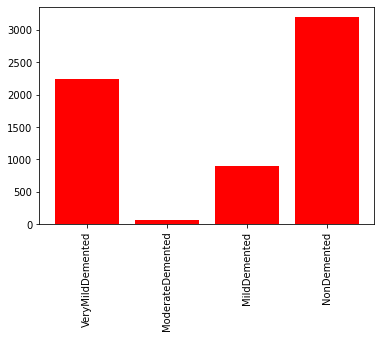

In [7]:
# The key and values of teh dictionary is then plotetd out as a bar chat
plt.bar(files_d.keys(), list(files_d.values()), color = 'red')
plt.xticks(rotation = 90)
plt.savefig('original_fd.jpg')

In [8]:
# The same is done fro the Augmented dataset
files_d2 = {}
dir_n2 = list(os.walk('AugmentedAlzheimerDataset'))[0][1]
for i,d in enumerate(list(os.walk('AugmentedAlzheimerDataset'))):
  if i != 0:
    files_d2[dir_n[i-1]] = len(d[2])

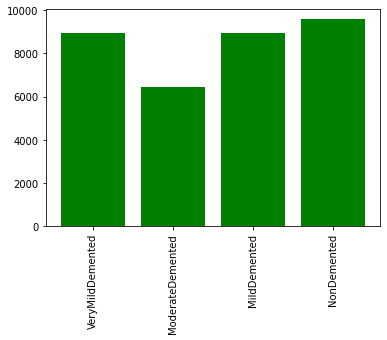

In [9]:
plt.bar(files_d2.keys(), list(files_d2.values()),color = 'green')
plt.xticks(rotation = 90)
plt.savefig('augmented_fd.jpg')

# Data Wrangling

In [10]:
# After downloading the data, it has to to be restructured for easy use
# WE create a folder called Augmented, and then a folder called val and in turn create a corresponding subdirectory for each subdirectory and randomly move pictures from a subdirectory to its corresponding subdirectory as long as
# the num of pics in the corresponding subdirectory is not more than the length of the directory divided by 3
for dir in os.listdir('AugmentedAlzheimerDataset'):
  if not os.path.exists('Augmented/val'):
    os.mkdir('Augmented')
    os.mkdir('Augmented/val')
  os.mkdir(os.path.join('Augmented/val', dir))
  sub_d = os.listdir(os.path.join('AugmentedAlzheimerDataset', dir))
  l = len(sub_d) // 3
  for file in sub_d:
    r = random.randint(0, 10)
    if r > 7 and len(os.listdir(os.path.join('Augmented/val', dir))) < l :
      shutil.move(os.path.join('AugmentedAlzheimerDataset',dir,file) , os.path.join('Augmented/val', dir))

In [11]:
# The remaining pictures which were not moved in the previous steps are then moved to a floder called train in the augemnted folder
for dir in os.listdir('AugmentedAlzheimerDataset'):
  if not os.path.exists('Augmented/train'):
    #os.mkdir('Augmented')
    os.mkdir('Augmented/train')
  os.mkdir(os.path.join('Augmented/train', dir))
  sub_d = os.listdir(os.path.join('AugmentedAlzheimerDataset', dir))
  for file in sub_d:
     shutil.move(os.path.join('AugmentedAlzheimerDataset',dir,file) , os.path.join('Augmented/train', dir))

In [12]:
# The same process is then carried out for the folder containing original images
for dir in os.listdir('OriginalDataset'):
  if not os.path.exists('Original/val'):
    print('h')
    os.mkdir('Original')
    os.mkdir('Original/val')
  os.mkdir(os.path.join('Original/val', dir))
  sub_d = os.listdir(os.path.join('OriginalDataset', dir))
  l = len(sub_d) // 3
  for file in sub_d:
    r = random.randint(0, 10)
    #print(r)
    if r > 7 and len(os.listdir(os.path.join('Original/val', dir))) < l:
      shutil.move(os.path.join('OriginalDataset',dir,file) , os.path.join('Original/val', dir))

h


In [13]:
for dir in os.listdir('OriginalDataset'):
  if not os.path.exists('Original/train'):
    #os.mkdir('Original')
    os.mkdir('Original/train')
  os.mkdir(os.path.join('Original/train', dir))
  sub_d = os.listdir(os.path.join('OriginalDataset', dir))
  for file in sub_d:
    shutil.move(os.path.join('OriginalDataset',dir,file) , os.path.join('Original/train', dir))

In [14]:
# Skip this column for now until testing project begins
# This cell links colab to google drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#Run thi scolum only if you had errors in the previous cells, or better still, just restart the runtime
#This cell deletes the folders created
#!rm -r Augmented
#!rm -r Original

In [15]:
# The image generator is the best way to load image in batches for tensorflow
train_image_generator = ImageDataGenerator(rescale=1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,rotation_range = 30)
val_image_gen = ImageDataGenerator(rescale=1./255)

Or_train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='Original/train',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

Or_val_data_gen = val_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory='Original/val',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), shuffle = False)

Aug_train_data_gen =  train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory='Augmented/train',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

Aug_val_data_gen = val_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory='Augmented/val',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), shuffle = False)


Found 4656 images belonging to 4 classes.
Found 1744 images belonging to 4 classes.
Found 24667 images belonging to 4 classes.
Found 9317 images belonging to 4 classes.


In [17]:
# We confirm the classes and the corresponding index
Or_val_data_gen.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

# Helper Functions

In [18]:
 def train_m_copy(model, train_data_gen, val_data_gen, epochs = 10, val_steps = 5, restart = True, lr = 1e-2, callback = []):
  if restart: # if restart is set to true, then we know the model arguement must be a function constructor that creates a new model
    m = model() # We call the function and create a new model, then train and return the model and its history
    history = m.fit(train_data_gen , epochs = epochs, validation_data = val_data_gen, validation_steps= val_steps, callbacks = callback)
    return m, history
  else: # if resrat is false, then we know th emodel arguement must be an already created model, and we just train and return
    history = model.fit(train_data_gen , epochs = epochs, validation_data = val_data_gen, validation_steps= val_steps, callbacks = callback)
    return model, history

In [19]:
def split_history(history_dict : dict): # The input to this function must be a dict hnece the ": dict" in the definition
  # We acess each metric in the dictionary and return all of them to be unpacked
  loss = history_dict.history['loss']
  val_loss = history_dict.history['val_loss']
  acc = history_dict.history['accuracy']
  val_acc = history_dict.history['val_accuracy']
  return loss, val_loss, acc, val_acc

In [20]:
def plot_history(training_loss, training_acc, val_loss, val_acc, s = False):
  fig, axes = plt.subplots(1, 2, figsize = (10,5)) # We first create a fsubplot with 1 row and 2 columns, and plot loss (val and train), and accuracy (val and train) as line plots on each subplot respectively
  axes[0].plot(training_loss, label = 'Training Loss')
  axes[0].plot(val_loss, label = 'Val Loss')
  axes[0].legend()
  axes[0].set_title('Loss Plot')
  axes[1].plot(training_acc, label = 'Training Accuracy')
  axes[1].plot(val_acc, label = 'Validation Accuracy')
  axes[1].legend()
  axes[1].set_title('Accuracy Plot')
  fig.tight_layout()
  if s: # id s is set to true, then we wish to save the image
    title = input('> ')
    fig.suptitle(title, fontsize = 16, y = -0.01)
    fig.savefig(title + '.jpg')

In [21]:
def plot_cm(labels, preds, s = False):
  cm = tf.math.confusion_matrix(labels=labels, predictions=preds).numpy() # we first the compute the correlation between the predicted and actual labels
  fig = plt.figure(figsize = (10,10))
  sns.heatmap(cm, annot = True, cmap = 'crest', fmt = '.1f') # The calculated correlation is passed to a heat map plotter
  if s:
    title = input('> ')
    plt.title(title)
    plt.savefig(title + '.jpg')

In [22]:
def cb(pth = ''):
  return tf.keras.callbacks.ModelCheckpoint(pth,save_best_only = True, save_freq = 'epoch', monitor = 'val_accuracy', mode = 'max') # we just return a callback with the specified path

# Hand created shallow model (depth less than 10)

In [23]:
def make_lw():
  model = Sequential([
      # Convolutional layer. Learn 32 filters using a 3x3 kernel
      tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_WIDTH, 3)),

      # Max-pooling layer, using 2x2 pool size
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      # Add a hidden layer with dropout
      tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),

      # Add an output layer with output units for all 10 digits
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")])

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  return model
model = make_lw()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

## Training and testing on original images

In [24]:
lw_or_cb = cb('/content/drive/MyDrive/paul/lw_or')
Original_model, Or_history = train_m_copy(make_lw, train_data_gen = Or_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 15, val_steps= 5, callback = [lw_or_cb])

Epoch 1/15
37/37 [==============================] - ETA: 0s - loss: 1.0473 - accuracy: 0.4901

37/37 [==============================] - 17s 240ms/step - loss: 1.0473 - accuracy: 0.4901 - val_loss: 1.2796 - val_accuracy: 0.5297
Epoch 2/15
37/37 [==============================] - 8s 206ms/step - loss: 0.9787 - accuracy: 0.5223 - val_loss: 1.1350 - val_accuracy: 0.2984
Epoch 3/15
37/37 [==============================] - 8s 214ms/step - loss: 0.9387 - accuracy: 0.5421 - val_loss: 1.0521 - val_accuracy: 0.3672
Epoch 4/15
37/37 [==============================] - 8s 210ms/step - loss: 0.9532 - accuracy: 0.5301 - val_loss: 1.1682 - val_accuracy: 0.2812
Epoch 5/15
37/37 [==============================] - 7s 202ms/step - loss: 0.9233 - accuracy: 0.5513 - val_loss: 1.0910 - val_accuracy: 0.3469
Epoch 6/15
37/37 [==============================] - 7s 201ms/step - loss: 0.9127 - accuracy: 0.5634 - val_loss: 1.2188 - val_accuracy: 0.2234
Epoch 7/15
37/37 [==============================] - 8s 205ms/step - loss: 0.9072 - accuracy: 0.5696 - val_loss: 1.0159 - val_accuracy: 0.3781
Epoch 8/15
37/37

37/37 [==============================] - 8s 228ms/step - loss: 0.8936 - accuracy: 0.5732 - val_loss: 1.0098 - val_accuracy: 0.6594
Epoch 11/15
37/37 [==============================] - 7s 201ms/step - loss: 0.8872 - accuracy: 0.5752 - val_loss: 1.1264 - val_accuracy: 0.5406
Epoch 12/15
37/37 [==============================] - 7s 199ms/step - loss: 0.8976 - accuracy: 0.5625 - val_loss: 1.2269 - val_accuracy: 0.4172
Epoch 13/15
37/37 [==============================] - 7s 202ms/step - loss: 0.8842 - accuracy: 0.5754 - val_loss: 0.9231 - val_accuracy: 0.5750
Epoch 14/15
37/37 [==============================] - 7s 199ms/step - loss: 0.8644 - accuracy: 0.5801 - val_loss: 0.9856 - val_accuracy: 0.4906
Epoch 15/15
37/37 [==============================] - 7s 201ms/step - loss: 0.8560 - accuracy: 0.5958 - val_loss: 0.9708 - val_accuracy: 0.6047


In [25]:
Original_model, Or_history2 = train_m_copy(Original_model, restart= False, train_data_gen = Or_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 15, val_steps= 5, callback = [lw_or_cb])

Epoch 1/15
37/37 [==============================] - 8s 206ms/step - loss: 0.8587 - accuracy: 0.5891 - val_loss: 1.2455 - val_accuracy: 0.4641
Epoch 2/15
37/37 [==============================] - ETA: 0s - loss: 0.8450 - accuracy: 0.5945

37/37 [==============================] - 9s 233ms/step - loss: 0.8450 - accuracy: 0.5945 - val_loss: 0.8743 - val_accuracy: 0.6797
Epoch 3/15
37/37 [==============================] - 8s 211ms/step - loss: 0.8140 - accuracy: 0.6153 - val_loss: 0.8833 - val_accuracy: 0.6187
Epoch 4/15
37/37 [==============================] - 9s 239ms/step - loss: 0.8291 - accuracy: 0.6031 - val_loss: 0.9081 - val_accuracy: 0.5906
Epoch 5/15
37/37 [==============================] - 8s 210ms/step - loss: 0.8137 - accuracy: 0.6072 - val_loss: 0.7989 - val_accuracy: 0.6484
Epoch 6/15
37/37 [==============================] - ETA: 0s - loss: 0.8081 - accuracy: 0.6181

37/37 [==============================] - 9s 238ms/step - loss: 0.8081 - accuracy: 0.6181 - val_loss: 0.6566 - val_accuracy: 0.7625
Epoch 7/15
37/37 [==============================] - 8s 218ms/step - loss: 0.7889 - accuracy: 0.6261 - val_loss: 1.3784 - val_accuracy: 0.6047
Epoch 8/15
37/37 [==============================] - 8s 227ms/step - loss: 0.7865 - accuracy: 0.6276 - val_loss: 0.6780 - val_accuracy: 0.7531
Epoch 9/15
37/37 [==============================] - 7s 202ms/step - loss: 0.7869 - accuracy: 0.6323 - val_loss: 0.7843 - val_accuracy: 0.6719
Epoch 10/15
37/37 [==============================] - 8s 204ms/step - loss: 0.7717 - accuracy: 0.6390 - val_loss: 0.9060 - val_accuracy: 0.6766
Epoch 11/15
37/37 [==============================] - 7s 199ms/step - loss: 0.7615 - accuracy: 0.6476 - val_loss: 0.6743 - val_accuracy: 0.7453
Epoch 12/15
37/37 [==============================] - 7s 202ms/step - loss: 0.7379 - accuracy: 0.6617 - val_loss: 1.0586 - val_accuracy: 0.6219
Epoch 13/15
37

37/37 [==============================] - 8s 229ms/step - loss: 0.7338 - accuracy: 0.6484 - val_loss: 0.5891 - val_accuracy: 0.7984
Epoch 15/15
37/37 [==============================] - 8s 211ms/step - loss: 0.7133 - accuracy: 0.6716 - val_loss: 0.6785 - val_accuracy: 0.7156


In [ ]:
or_loss, or_val_loss, or_acc, or_val_acc = split_history(Or_history)
or_loss2, or_val_loss2, or_acc2, or_val_acc2 = split_history(Or_history2)

> rrr


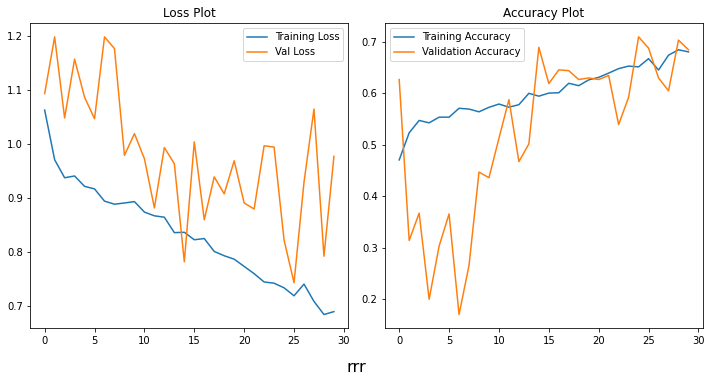

In [ ]:
plot_history(or_loss + or_loss2, or_acc + or_acc2, or_val_loss + or_val_loss2, or_val_acc + or_val_acc2, s = True)

In [ ]:
lw_model = tf.keras.models.load_model('/content/drive/MyDrive/paul/lw_or')

In [ ]:
predictions = np.argmax(lw_model.predict(Or_val_data_gen), axis = 1)

14/14 [==============================] - 1s 74ms/step


> Original_cm


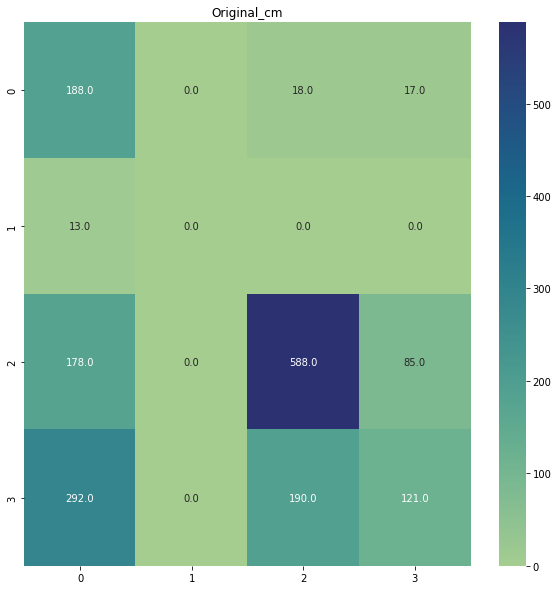

In [ ]:
plot_cm(Or_val_data_gen.classes, predictions, s = True)

## Training and testing on augmented images

In [ ]:
lw_aug_cb = cb('/content/drive/MyDrive/paul/lw_aug')
Aug_model, Aug_history = train_m_copy(make_lw, Aug_train_data_gen , epochs = 15, val_data_gen = Aug_val_data_gen, val_steps= 5, callback = [lw_aug_cb])

Epoch 1/15
194/194 [==============================] - ETA: 0s - loss: 1.2072 - accuracy: 0.4213

194/194 [==============================] - 54s 275ms/step - loss: 1.2072 - accuracy: 0.4213 - val_loss: 1.1102 - val_accuracy: 0.5953
Epoch 2/15
194/194 [==============================] - ETA: 0s - loss: 0.9555 - accuracy: 0.5553

194/194 [==============================] - 51s 265ms/step - loss: 0.9555 - accuracy: 0.5553 - val_loss: 0.8120 - val_accuracy: 0.6859
Epoch 3/15
194/194 [==============================] - ETA: 0s - loss: 0.8399 - accuracy: 0.6078

194/194 [==============================] - 51s 263ms/step - loss: 0.8399 - accuracy: 0.6078 - val_loss: 0.5931 - val_accuracy: 0.8562
Epoch 4/15
194/194 [==============================] - 50s 256ms/step - loss: 0.7853 - accuracy: 0.6332 - val_loss: 0.6319 - val_accuracy: 0.7937
Epoch 5/15
194/194 [==============================] - ETA: 0s - loss: 0.7359 - accuracy: 0.6569

194/194 [==============================] - 52s 269ms/step - loss: 0.7359 - accuracy: 0.6569 - val_loss: 0.3504 - val_accuracy: 0.9281
Epoch 6/15
194/194 [==============================] - 50s 258ms/step - loss: 0.7052 - accuracy: 0.6719 - val_loss: 0.6246 - val_accuracy: 0.7891
Epoch 7/15
194/194 [==============================] - 49s 254ms/step - loss: 0.6696 - accuracy: 0.6904 - val_loss: 0.4539 - val_accuracy: 0.8516
Epoch 8/15
194/194 [==============================] - 49s 254ms/step - loss: 0.6546 - accuracy: 0.6987 - val_loss: 0.5665 - val_accuracy: 0.7766
Epoch 9/15
194/194 [==============================] - 51s 262ms/step - loss: 0.6176 - accuracy: 0.7170 - val_loss: 0.3493 - val_accuracy: 0.9078
Epoch 10/15
194/194 [==============================] - 50s 257ms/step - loss: 0.6023 - accuracy: 0.7233 - val_loss: 0.7990 - val_accuracy: 0.6906
Epoch 11/15
194/194 [==============================] - 50s 255ms/step - loss: 0.5772 - accuracy: 0.7398 - val_loss: 0.3247 - val_accuracy: 0

In [ ]:
Aug_model, Aug_history2 = train_m_copy(Aug_model,Aug_train_data_gen, restart = False, epochs = 15, val_data_gen = Aug_val_data_gen, val_steps= 5, callback = [lw_aug_cb])

Epoch 1/15
194/194 [==============================] - 50s 255ms/step - loss: 0.4794 - accuracy: 0.7886 - val_loss: 0.3316 - val_accuracy: 0.8844
Epoch 2/15
194/194 [==============================] - 49s 255ms/step - loss: 0.4536 - accuracy: 0.8031 - val_loss: 0.2391 - val_accuracy: 0.9125
Epoch 3/15
194/194 [==============================] - 51s 264ms/step - loss: 0.4370 - accuracy: 0.8113 - val_loss: 0.3079 - val_accuracy: 0.9016
Epoch 4/15
194/194 [==============================] - 50s 256ms/step - loss: 0.4215 - accuracy: 0.8159 - val_loss: 0.3367 - val_accuracy: 0.8766
Epoch 5/15
194/194 [==============================] - 50s 256ms/step - loss: 0.4084 - accuracy: 0.8256 - val_loss: 0.2371 - val_accuracy: 0.9141
Epoch 6/15
194/194 [==============================] - 49s 252ms/step - loss: 0.3885 - accuracy: 0.8363 - val_loss: 0.2952 - val_accuracy: 0.8875
Epoch 7/15
194/194 [==============================] - 50s 260ms/step - loss: 0.3777 - accuracy: 0.8407 - val_loss: 0.2752 - val_ac

In [ ]:
aug_loss, aug_val_loss, aug_acc, aug_val_acc = split_history(Aug_history)
aug_loss2, aug_val_loss2, aug_acc2, aug_val_acc2 = split_history(Aug_history2)

> Augmented_Data


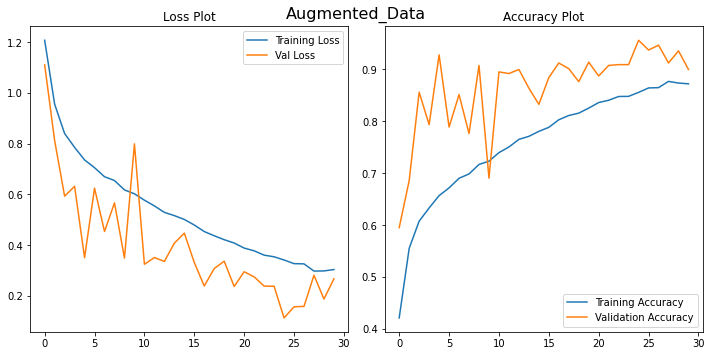

In [ ]:
plot_history(aug_loss + aug_loss2, aug_acc + aug_acc2, aug_val_loss + aug_val_loss2, aug_val_acc + aug_val_acc2, s = True)

In [ ]:
aug_model = tf.keras.models.load_model('/content/drive/MyDrive/paul/lw_aug')

In [ ]:
p = np.argmax(aug_model.predict(Aug_val_data_gen), axis = 1)

72/72 [==============================] - 9s 123ms/step


> aug_cm


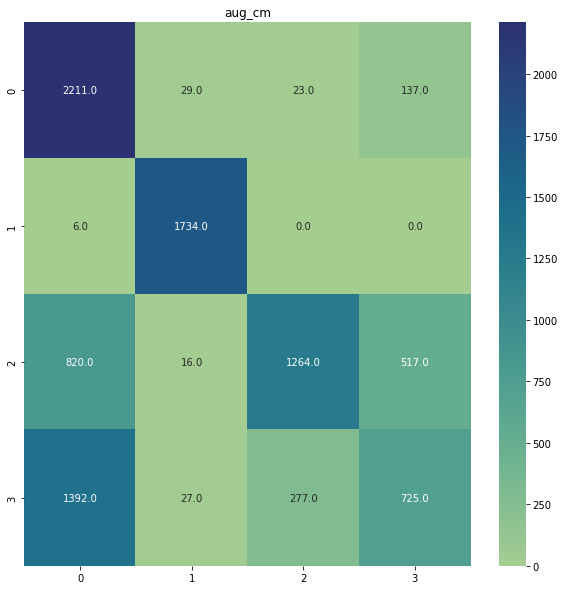

In [ ]:
plot_cm(Aug_val_data_gen.classes, p, s = True)

## Training on Augmented and testing on Original

In [ ]:
lw_mx_cb = cb('/content/drive/MyDrive/paul/lw_mx')
mx_model, mx_history = train_m_copy(make_lw, Aug_train_data_gen , epochs = 30, val_data_gen = Or_val_data_gen, val_steps= 5, callback = [lw_mx_cb])

Epoch 1/30
194/194 [==============================] - ETA: 0s - loss: 1.2281 - accuracy: 0.4095

194/194 [==============================] - 51s 259ms/step - loss: 1.2281 - accuracy: 0.4095 - val_loss: 0.9291 - val_accuracy: 0.5578
Epoch 2/30
194/194 [==============================] - ETA: 0s - loss: 0.9613 - accuracy: 0.5587

194/194 [==============================] - 50s 257ms/step - loss: 0.9613 - accuracy: 0.5587 - val_loss: 0.8626 - val_accuracy: 0.5906
Epoch 3/30
194/194 [==============================] - ETA: 0s - loss: 0.8490 - accuracy: 0.6067

194/194 [==============================] - 51s 261ms/step - loss: 0.8490 - accuracy: 0.6067 - val_loss: 0.7309 - val_accuracy: 0.6953
Epoch 4/30
194/194 [==============================] - ETA: 0s - loss: 0.7921 - accuracy: 0.6355

194/194 [==============================] - 51s 263ms/step - loss: 0.7921 - accuracy: 0.6355 - val_loss: 0.7014 - val_accuracy: 0.7219
Epoch 5/30
194/194 [==============================] - ETA: 0s - loss: 0.7461 - accuracy: 0.6564

194/194 [==============================] - 51s 263ms/step - loss: 0.7461 - accuracy: 0.6564 - val_loss: 0.6093 - val_accuracy: 0.7812
Epoch 6/30
194/194 [==============================] - 50s 255ms/step - loss: 0.7099 - accuracy: 0.6704 - val_loss: 0.7935 - val_accuracy: 0.6313
Epoch 7/30
194/194 [==============================] - 49s 253ms/step - loss: 0.6762 - accuracy: 0.6923 - val_loss: 0.6460 - val_accuracy: 0.7312
Epoch 8/30
194/194 [==============================] - 50s 256ms/step - loss: 0.6484 - accuracy: 0.7047 - val_loss: 0.6422 - val_accuracy: 0.7047
Epoch 9/30
194/194 [==============================] - 49s 254ms/step - loss: 0.6179 - accuracy: 0.7189 - val_loss: 0.7097 - val_accuracy: 0.7094
Epoch 10/30
194/194 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.7323

194/194 [==============================] - 50s 257ms/step - loss: 0.5947 - accuracy: 0.7323 - val_loss: 0.5002 - val_accuracy: 0.7906
Epoch 11/30
194/194 [==============================] - 50s 255ms/step - loss: 0.5650 - accuracy: 0.7490 - val_loss: 0.6614 - val_accuracy: 0.6891
Epoch 12/30
194/194 [==============================] - 50s 259ms/step - loss: 0.5446 - accuracy: 0.7556 - val_loss: 0.6414 - val_accuracy: 0.6984
Epoch 13/30
194/194 [==============================] - 49s 253ms/step - loss: 0.5208 - accuracy: 0.7682 - val_loss: 0.4784 - val_accuracy: 0.7859
Epoch 14/30
194/194 [==============================] - ETA: 0s - loss: 0.5001 - accuracy: 0.7790

194/194 [==============================] - 50s 260ms/step - loss: 0.5001 - accuracy: 0.7790 - val_loss: 0.3616 - val_accuracy: 0.8781
Epoch 15/30
194/194 [==============================] - 49s 255ms/step - loss: 0.4921 - accuracy: 0.7860 - val_loss: 0.4958 - val_accuracy: 0.8141
Epoch 16/30
194/194 [==============================] - 50s 260ms/step - loss: 0.4645 - accuracy: 0.7985 - val_loss: 0.3834 - val_accuracy: 0.8281
Epoch 17/30
194/194 [==============================] - 49s 251ms/step - loss: 0.4516 - accuracy: 0.8052 - val_loss: 0.4637 - val_accuracy: 0.8078
Epoch 18/30
194/194 [==============================] - 51s 262ms/step - loss: 0.4308 - accuracy: 0.8154 - val_loss: 0.4734 - val_accuracy: 0.8328
Epoch 19/30
194/194 [==============================] - ETA: 0s - loss: 0.4144 - accuracy: 0.8211

194/194 [==============================] - 51s 261ms/step - loss: 0.4144 - accuracy: 0.8211 - val_loss: 0.3278 - val_accuracy: 0.8922
Epoch 20/30
194/194 [==============================] - 51s 261ms/step - loss: 0.4015 - accuracy: 0.8270 - val_loss: 0.3937 - val_accuracy: 0.8766
Epoch 21/30
194/194 [==============================] - ETA: 0s - loss: 0.3854 - accuracy: 0.8361

194/194 [==============================] - 50s 258ms/step - loss: 0.3854 - accuracy: 0.8361 - val_loss: 0.2932 - val_accuracy: 0.8938
Epoch 22/30
194/194 [==============================] - 49s 253ms/step - loss: 0.3769 - accuracy: 0.8424 - val_loss: 0.3628 - val_accuracy: 0.8891
Epoch 23/30
194/194 [==============================] - 49s 252ms/step - loss: 0.3555 - accuracy: 0.8521 - val_loss: 0.5160 - val_accuracy: 0.8438
Epoch 24/30
194/194 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8535

194/194 [==============================] - 51s 262ms/step - loss: 0.3508 - accuracy: 0.8535 - val_loss: 0.3324 - val_accuracy: 0.9016
Epoch 25/30
194/194 [==============================] - 49s 252ms/step - loss: 0.3296 - accuracy: 0.8621 - val_loss: 0.4075 - val_accuracy: 0.8438
Epoch 26/30
194/194 [==============================] - ETA: 0s - loss: 0.3321 - accuracy: 0.8625

194/194 [==============================] - 50s 257ms/step - loss: 0.3321 - accuracy: 0.8625 - val_loss: 0.2798 - val_accuracy: 0.9062
Epoch 27/30
194/194 [==============================] - 49s 254ms/step - loss: 0.3065 - accuracy: 0.8717 - val_loss: 0.6165 - val_accuracy: 0.8031
Epoch 28/30
194/194 [==============================] - 50s 255ms/step - loss: 0.3020 - accuracy: 0.8751 - val_loss: 0.3411 - val_accuracy: 0.8844
Epoch 29/30
132/194 [===================>..........] - ETA: 15s - loss: 0.2978 - accuracy: 0.8782

In [ ]:
mx_loss, mx_val_loss, mx_acc, mx_val_acc = split_history(mx_history)

> Augmented_Train_Unaugmented_Val


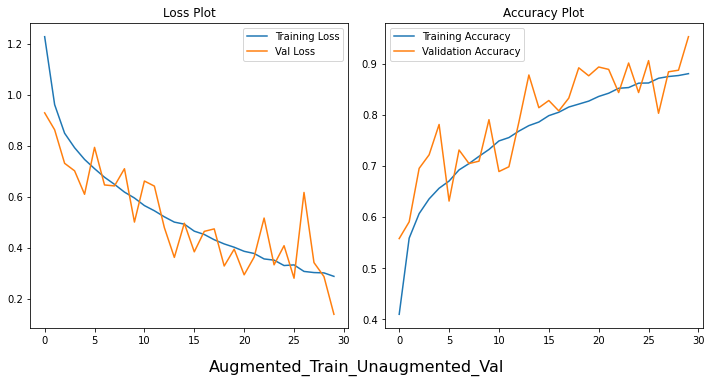

In [ ]:
plot_history(mx_loss,mx_acc, mx_val_loss, mx_val_acc, s = True)

In [ ]:
mx_model = tf.keras.models.load_model('/content/drive/MyDrive/paul/lw_mx')

In [ ]:
pr = np.argmax(mx_model.predict(Or_val_data_gen), axis = 1)

14/14 [==============================] - 1s 74ms/step


> aug_train_or_val


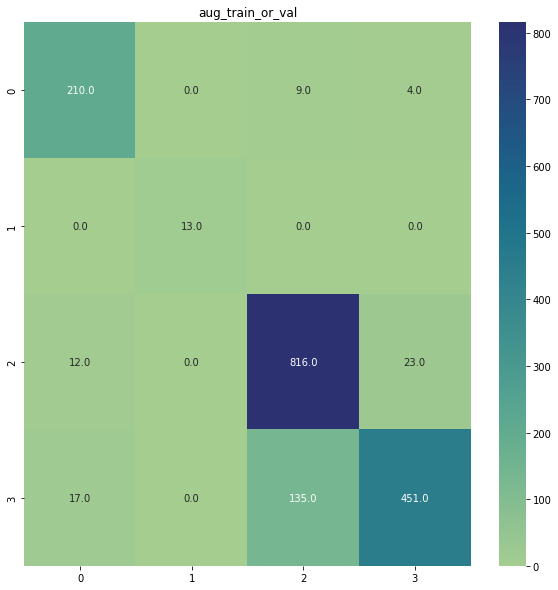

In [ ]:
plot_cm(Or_val_data_gen.classes, pr, s = True)

# Trasfer learning

## Vgg 19 model

In [ ]:
def make_vgg():
  vgg19_base = tf.keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_HEIGHT, IMG_HEIGHT, 3),
      include_top=False)
  # The code above calls the vgg19 base architecture

  vgg19_base.trainable = False
  # We then set the base trainable to feature, so that the imageNets weights are not altered

  inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_HEIGHT, 3))
  inputs = tf.keras.applications.vgg19.preprocess_input(inputs) 
  x = vgg19_base(inputs, training=False)
  # Convert features of shape `base_model.output_shape[1:]` to vectors
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  # A Dense classifier with a single unit (binary classification)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(64)(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dense(4)(x)
  outputs = tf.keras.layers.Activation('softmax')(x)
  vgg19 = tf.keras.Model(inputs, outputs)

  vgg19.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
  return vgg19_base, vgg19

In [ ]:
def edit_vgg(base, model):
  base.trainable = True
  model.compile(
      optimizer=tf.keras.optimizers.Adam(1e-4),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
  return model

In [ ]:
make_vgg()[1].summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 activation (Activation)     (None, 64)                0      

### Training and testing on original images

In [ ]:
#!rm -r /content/drive/MyDrive/paul/vgg_or

In [ ]:
# Fit on the Original(Non-Augmented) data
vgg_or_cb = cb('/content/drive/MyDrive/paul/vgg_or')
Or_vgg_base, Or_vgg19_model = make_vgg()
Or_vgg19_model, vgg19_Or_hist = train_m_copy(Or_vgg19_model,restart = False, train_data_gen = Or_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 30, val_steps= 5, callback = [vgg_or_cb])

80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/30
37/37 [==============================] - ETA: 0s - loss: 1.0242 - accuracy: 0.5139

37/37 [==============================] - 14s 338ms/step - loss: 1.0242 - accuracy: 0.5139 - val_loss: 1.3084 - val_accuracy: 0.4750
Epoch 2/30
37/37 [==============================] - ETA: 0s - loss: 0.9722 - accuracy: 0.5311

37/37 [==============================] - 11s 308ms/step - loss: 0.9722 - accuracy: 0.5311 - val_loss: 1.0867 - val_accuracy: 0.4953
Epoch 3/30
37/37 [==============================] - ETA: 0s - loss: 0.9542 - accuracy: 0.5359

37/37 [==============================] - 11s 297ms/step - loss: 0.9542 - accuracy: 0.5359 - val_loss: 1.1219 - val_accuracy: 0.5156
Epoch 4/30
37/37 [==============================] - 8s 221ms/step - loss: 0.9458 - accuracy: 0.5366 - val_loss: 1.1008 - val_accuracy: 0.4672
Epoch 5/30
37/37 [==============================] - ETA: 0s - loss: 0.9391 - accuracy: 0.5429

37/37 [==============================] - 12s 323ms/step - loss: 0.9391 - accuracy: 0.5429 - val_loss: 1.0460 - val_accuracy: 0.5547
Epoch 6/30
37/37 [==============================] - 8s 222ms/step - loss: 0.9351 - accuracy: 0.5455 - val_loss: 1.1713 - val_accuracy: 0.4578
Epoch 7/30
37/37 [==============================] - 8s 225ms/step - loss: 0.9288 - accuracy: 0.5408 - val_loss: 1.1972 - val_accuracy: 0.3359
Epoch 8/30
37/37 [==============================] - 8s 221ms/step - loss: 0.9322 - accuracy: 0.5410 - val_loss: 1.0412 - val_accuracy: 0.5047
Epoch 9/30
37/37 [==============================] - 9s 252ms/step - loss: 0.9329 - accuracy: 0.5400 - val_loss: 1.1478 - val_accuracy: 0.4344
Epoch 10/30
37/37 [==============================] - 8s 223ms/step - loss: 0.9237 - accuracy: 0.5446 - val_loss: 1.1355 - val_accuracy: 0.4031
Epoch 11/30
37/37 [==============================] - 8s 221ms/step - loss: 0.9182 - accuracy: 0.5461 - val_loss: 1.0330 - val_accuracy: 0.4734
Epoch 12/30
37

37/37 [==============================] - 11s 289ms/step - loss: 0.9181 - accuracy: 0.5487 - val_loss: 1.0003 - val_accuracy: 0.5672
Epoch 14/30
37/37 [==============================] - 8s 220ms/step - loss: 0.9092 - accuracy: 0.5584 - val_loss: 1.0416 - val_accuracy: 0.4953
Epoch 15/30
37/37 [==============================] - 9s 231ms/step - loss: 0.9077 - accuracy: 0.5578 - val_loss: 1.1690 - val_accuracy: 0.3766
Epoch 16/30
37/37 [==============================] - 8s 220ms/step - loss: 0.9083 - accuracy: 0.5580 - val_loss: 0.9816 - val_accuracy: 0.5656
Epoch 17/30
37/37 [==============================] - 8s 220ms/step - loss: 0.9110 - accuracy: 0.5423 - val_loss: 1.0834 - val_accuracy: 0.4500
Epoch 18/30
37/37 [==============================] - 8s 226ms/step - loss: 0.9090 - accuracy: 0.5556 - val_loss: 1.0713 - val_accuracy: 0.4203
Epoch 19/30
37/37 [==============================] - 8s 219ms/step - loss: 0.9003 - accuracy: 0.5631 - val_loss: 1.0969 - val_accuracy: 0.3844
Epoch 20/3

37/37 [==============================] - 11s 294ms/step - loss: 0.8902 - accuracy: 0.5603 - val_loss: 0.9708 - val_accuracy: 0.5719


In [ ]:
or_vgg_loss, or_vgg_val_loss, or_vgg_acc, or_vgg_val_acc = split_history(vgg19_Or_hist)

> Vgg_before_unfreezing(unaugmented)


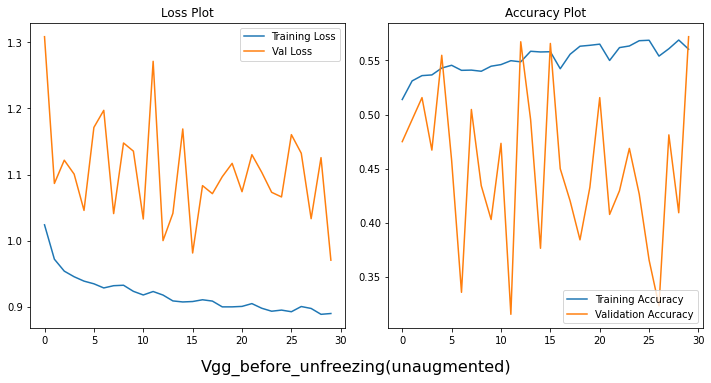

In [ ]:
plot_history(or_vgg_loss, or_vgg_acc,or_vgg_val_loss, or_vgg_val_acc, s = True)

> Vgg_CM_before_unfreezing(Unaugmented)


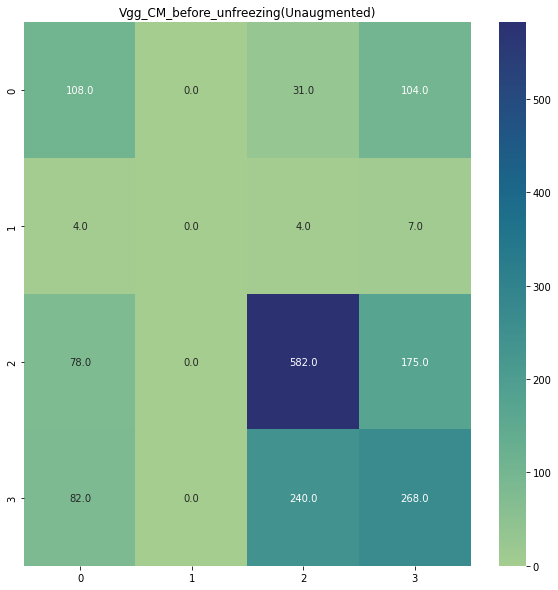

In [ ]:
_vgg_or = tf.keras.models.load_model('/content/drive/MyDrive/paul/vgg_or')
_vgg_or_predictions = np.argmax(_vgg_or.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _vgg_or_predictions, s = True)

In [ ]:
Or_vgg19_model = edit_vgg(Or_vgg_base, Or_vgg19_model)

In [ ]:
vgg_or_cb2 = cb('/content/drive/MyDrive/paul/vgg_or2')
Or_vgg19_model, vgg19_Or_hist2 = train_m_copy(Or_vgg19_model,restart = False, train_data_gen = Or_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 15, val_steps= 5, callback = [vgg_or_cb2])

Epoch 1/15
37/37 [==============================] - ETA: 0s - loss: 1.1941 - accuracy: 0.5005

37/37 [==============================] - 18s 417ms/step - loss: 1.1941 - accuracy: 0.5005 - val_loss: 1.1986 - val_accuracy: 0.5969
Epoch 2/15
37/37 [==============================] - 10s 265ms/step - loss: 1.0256 - accuracy: 0.4957 - val_loss: 1.1014 - val_accuracy: 0.4422
Epoch 3/15
37/37 [==============================] - 12s 317ms/step - loss: 1.0082 - accuracy: 0.4997 - val_loss: 1.1244 - val_accuracy: 0.3891
Epoch 4/15
37/37 [==============================] - 10s 276ms/step - loss: 0.9480 - accuracy: 0.5410 - val_loss: 1.0065 - val_accuracy: 0.4156
Epoch 5/15
37/37 [==============================] - 9s 250ms/step - loss: 0.9205 - accuracy: 0.5550 - val_loss: 1.0214 - val_accuracy: 0.3328
Epoch 6/15
37/37 [==============================] - ETA: 0s - loss: 0.9003 - accuracy: 0.5658

37/37 [==============================] - 13s 350ms/step - loss: 0.9003 - accuracy: 0.5658 - val_loss: 0.8917 - val_accuracy: 0.6344
Epoch 7/15
37/37 [==============================] - 10s 266ms/step - loss: 0.8881 - accuracy: 0.5771 - val_loss: 0.9427 - val_accuracy: 0.5156
Epoch 8/15
37/37 [==============================] - 9s 248ms/step - loss: 0.8727 - accuracy: 0.5811 - val_loss: 0.8842 - val_accuracy: 0.5953
Epoch 9/15
37/37 [==============================] - 9s 251ms/step - loss: 0.8760 - accuracy: 0.5798 - val_loss: 0.9784 - val_accuracy: 0.4313
Epoch 10/15
37/37 [==============================] - 9s 248ms/step - loss: 0.8735 - accuracy: 0.5802 - val_loss: 0.9643 - val_accuracy: 0.4484
Epoch 11/15
37/37 [==============================] - 9s 249ms/step - loss: 0.8580 - accuracy: 0.5828 - val_loss: 0.8439 - val_accuracy: 0.6047
Epoch 12/15
37/37 [==============================] - 9s 251ms/step - loss: 0.8433 - accuracy: 0.5925 - val_loss: 0.9301 - val_accuracy: 0.4750
Epoch 13/15


> Vgg_after_unfreezing(Unaugmented)


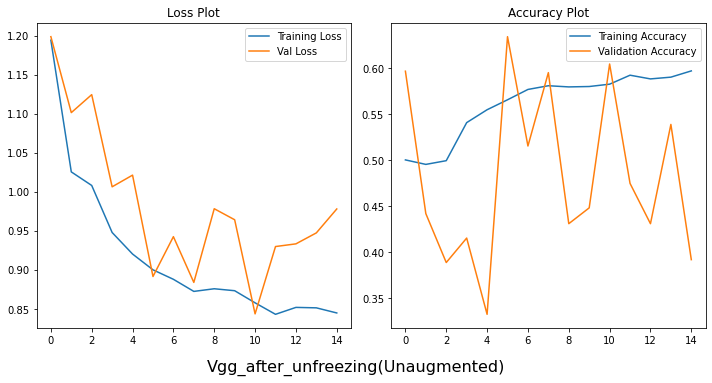

In [ ]:
or_vgg_loss2, or_vgg_val_loss2, or_vgg_acc2, or_vgg_val_acc2 = split_history(vgg19_Or_hist2)
plot_history(or_vgg_loss2, or_vgg_acc2,or_vgg_val_loss2, or_vgg_val_acc2, s = True)

14/14 [==============================] - 1s 77ms/step
> Vgg_CM_after_unfreezing(Unaugmented)


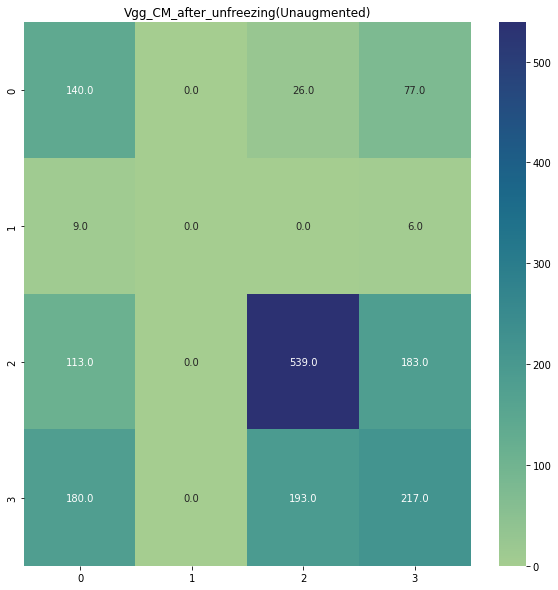

In [ ]:
_vgg_or2 = tf.keras.models.load_model('/content/drive/MyDrive/paul/vgg_or2')
_vgg_or_predictions2 = np.argmax(_vgg_or2.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _vgg_or_predictions2, s = True)

### Training and testing on augmented images

In [ ]:
# Fit on the augmented data
vgg_aug_cb = cb('/content/drive/MyDrive/paul/vgg_aug')
aug_vgg_base, aug_vgg19_model = make_vgg()
Aug_vgg19_model, vgg19_Aug_hist = train_m_copy(aug_vgg19_model, restart = False, train_data_gen  = Aug_train_data_gen , epochs = 30, val_data_gen = Aug_val_data_gen, val_steps= 5, callback = [vgg_aug_cb])

Epoch 1/30
194/194 [==============================] - ETA: 0s - loss: 1.2566 - accuracy: 0.4020

194/194 [==============================] - 54s 273ms/step - loss: 1.2566 - accuracy: 0.4020 - val_loss: 1.3597 - val_accuracy: 0.2250
Epoch 2/30
194/194 [==============================] - ETA: 0s - loss: 1.1808 - accuracy: 0.4540

194/194 [==============================] - 52s 269ms/step - loss: 1.1808 - accuracy: 0.4540 - val_loss: 1.0955 - val_accuracy: 0.6469
Epoch 3/30
194/194 [==============================] - 49s 255ms/step - loss: 1.1474 - accuracy: 0.4754 - val_loss: 1.1279 - val_accuracy: 0.6203
Epoch 4/30
194/194 [==============================] - ETA: 0s - loss: 1.1186 - accuracy: 0.4938

194/194 [==============================] - 52s 269ms/step - loss: 1.1186 - accuracy: 0.4938 - val_loss: 0.9762 - val_accuracy: 0.6641
Epoch 5/30
194/194 [==============================] - 49s 255ms/step - loss: 1.0952 - accuracy: 0.5064 - val_loss: 1.0841 - val_accuracy: 0.5969
Epoch 6/30
194/194 [==============================] - ETA: 0s - loss: 1.0768 - accuracy: 0.5161

194/194 [==============================] - 52s 268ms/step - loss: 1.0768 - accuracy: 0.5161 - val_loss: 0.8614 - val_accuracy: 0.7844
Epoch 7/30
194/194 [==============================] - 50s 255ms/step - loss: 1.0649 - accuracy: 0.5243 - val_loss: 0.8633 - val_accuracy: 0.7594
Epoch 8/30
194/194 [==============================] - 50s 257ms/step - loss: 1.0499 - accuracy: 0.5311 - val_loss: 0.8831 - val_accuracy: 0.7375
Epoch 9/30
194/194 [==============================] - 49s 254ms/step - loss: 1.0419 - accuracy: 0.5373 - val_loss: 0.9481 - val_accuracy: 0.6969
Epoch 10/30
194/194 [==============================] - 49s 252ms/step - loss: 1.0322 - accuracy: 0.5415 - val_loss: 0.7997 - val_accuracy: 0.7812
Epoch 11/30
194/194 [==============================] - 49s 253ms/step - loss: 1.0204 - accuracy: 0.5466 - val_loss: 1.1214 - val_accuracy: 0.5047
Epoch 12/30
194/194 [==============================] - 50s 259ms/step - loss: 1.0147 - accuracy: 0.5480 - val_loss: 0.8157 - val_accuracy: 

194/194 [==============================] - 53s 272ms/step - loss: 0.9420 - accuracy: 0.5828 - val_loss: 0.7159 - val_accuracy: 0.8031
Epoch 23/30
194/194 [==============================] - 50s 258ms/step - loss: 0.9419 - accuracy: 0.5832 - val_loss: 0.9030 - val_accuracy: 0.6187
Epoch 24/30
194/194 [==============================] - 50s 259ms/step - loss: 0.9386 - accuracy: 0.5829 - val_loss: 0.8567 - val_accuracy: 0.7063
Epoch 25/30
194/194 [==============================] - 49s 252ms/step - loss: 0.9307 - accuracy: 0.5886 - val_loss: 1.0373 - val_accuracy: 0.5797
Epoch 26/30
194/194 [==============================] - 49s 253ms/step - loss: 0.9232 - accuracy: 0.5911 - val_loss: 0.9814 - val_accuracy: 0.5938
Epoch 27/30
194/194 [==============================] - 49s 252ms/step - loss: 0.9248 - accuracy: 0.5897 - val_loss: 0.8465 - val_accuracy: 0.7203
Epoch 28/30
194/194 [==============================] - 50s 258ms/step - loss: 0.9250 - accuracy: 0.5895 - val_loss: 0.8897 - val_accurac

> Vgg_before_unfreezing(Augmented)


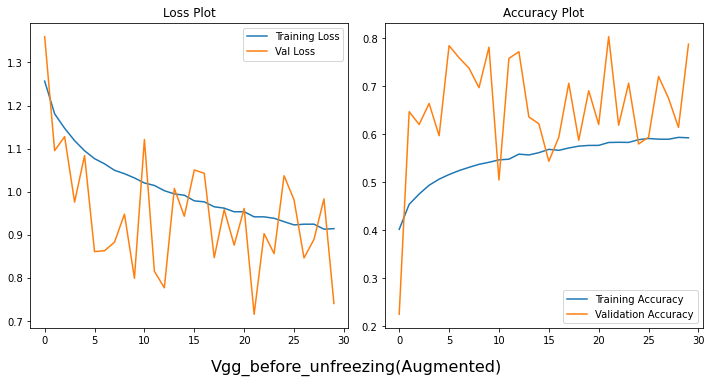

In [ ]:
aug_vgg_loss, aug_vgg_val_loss, aug_vgg_acc, aug_vgg_val_acc = split_history(vgg19_Aug_hist)
plot_history(aug_vgg_loss, aug_vgg_acc,aug_vgg_val_loss, aug_vgg_val_acc, s = True)

> Vgg_CM_before_unfreezing(Augmented)


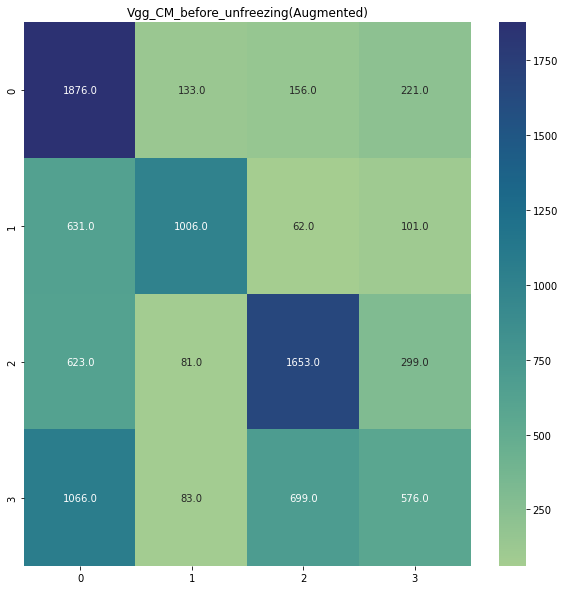

In [ ]:
_vgg_aug = tf.keras.models.load_model('/content/drive/MyDrive/paul/vgg_aug')
_vgg_aug_predictions = np.argmax(_vgg_aug.predict(Aug_val_data_gen), axis = 1)
plot_cm(Aug_val_data_gen.classes, _vgg_aug_predictions, s = True)

In [ ]:
Aug_vgg19_model = edit_vgg(aug_vgg_base, Aug_vgg19_model)

In [ ]:
vgg_aug_cb2 = cb('/content/drive/MyDrive/paul/vgg_aug2')
Aug_vgg19_model, vgg19_Aug_hist2 = train_m_copy(Aug_vgg19_model, restart = False, train_data_gen  = Aug_train_data_gen , epochs = 15, val_data_gen = Aug_val_data_gen, val_steps= 5, callback = [vgg_aug_cb2])

Epoch 1/15
194/194 [==============================] - ETA: 0s - loss: 1.5517 - accuracy: 0.3137

194/194 [==============================] - 62s 312ms/step - loss: 1.5517 - accuracy: 0.3137 - val_loss: 1.2548 - val_accuracy: 0.1906
Epoch 2/15
194/194 [==============================] - ETA: 0s - loss: 1.1285 - accuracy: 0.4633

194/194 [==============================] - 62s 318ms/step - loss: 1.1285 - accuracy: 0.4633 - val_loss: 1.0620 - val_accuracy: 0.6609
Epoch 3/15
194/194 [==============================] - 56s 288ms/step - loss: 0.8557 - accuracy: 0.5919 - val_loss: 0.9234 - val_accuracy: 0.6516
Epoch 4/15
194/194 [==============================] - 57s 292ms/step - loss: 0.7513 - accuracy: 0.6445 - val_loss: 0.9752 - val_accuracy: 0.5813
Epoch 5/15
194/194 [==============================] - 56s 290ms/step - loss: 0.6937 - accuracy: 0.6749 - val_loss: 1.0597 - val_accuracy: 0.5312
Epoch 6/15
194/194 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.7050

194/194 [==============================] - 59s 302ms/step - loss: 0.6396 - accuracy: 0.7050 - val_loss: 0.4537 - val_accuracy: 0.8703
Epoch 7/15
194/194 [==============================] - 58s 299ms/step - loss: 0.5838 - accuracy: 0.7374 - val_loss: 0.4585 - val_accuracy: 0.8516
Epoch 8/15
194/194 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.7733

194/194 [==============================] - 60s 308ms/step - loss: 0.5061 - accuracy: 0.7733 - val_loss: 0.1811 - val_accuracy: 0.9469
Epoch 9/15
194/194 [==============================] - 56s 287ms/step - loss: 0.4504 - accuracy: 0.8008 - val_loss: 0.4465 - val_accuracy: 0.8516
Epoch 10/15
194/194 [==============================] - ETA: 0s - loss: 0.3863 - accuracy: 0.8349

194/194 [==============================] - 60s 311ms/step - loss: 0.3863 - accuracy: 0.8349 - val_loss: 0.0976 - val_accuracy: 0.9891
Epoch 11/15
194/194 [==============================] - 57s 293ms/step - loss: 0.3324 - accuracy: 0.8614 - val_loss: 0.2300 - val_accuracy: 0.9234
Epoch 12/15
194/194 [==============================] - 57s 292ms/step - loss: 0.2891 - accuracy: 0.8807 - val_loss: 0.2089 - val_accuracy: 0.9328
Epoch 13/15
194/194 [==============================] - 55s 285ms/step - loss: 0.2394 - accuracy: 0.9061 - val_loss: 0.3095 - val_accuracy: 0.8922
Epoch 14/15
194/194 [==============================] - 57s 294ms/step - loss: 0.1901 - accuracy: 0.9259 - val_loss: 0.1278 - val_accuracy: 0.9578
Epoch 15/15
194/194 [==============================] - 56s 287ms/step - loss: 0.1750 - accuracy: 0.9307 - val_loss: 0.0768 - val_accuracy: 0.9719


> Vgg_after_unfreezing(Augmented)


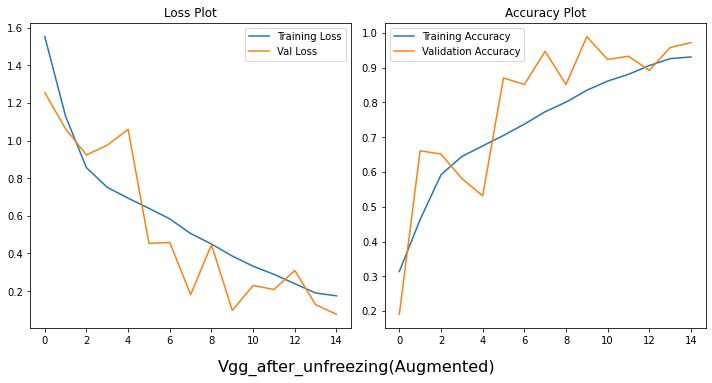

In [ ]:
aug_vgg_loss2, aug_vgg_val_loss2, aug_vgg_acc2, aug_vgg_val_acc2 = split_history(vgg19_Aug_hist2)
plot_history(aug_vgg_loss2, aug_vgg_acc2,aug_vgg_val_loss2, aug_vgg_val_acc2, s = True)

73/73 [==============================] - 9s 125ms/step
> Vgg_CM_after_unfreezing(Augmented)


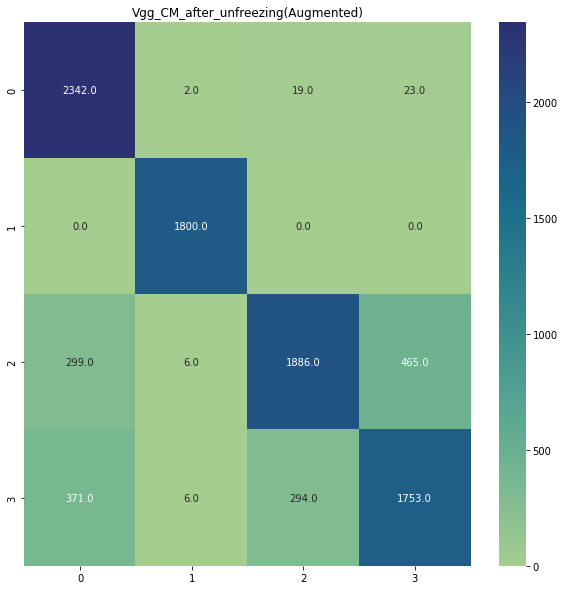

In [ ]:
_vgg_aug2 = tf.keras.models.load_model('/content/drive/MyDrive/paul/vgg_aug2')
_vgg_aug_predictions2 = np.argmax(_vgg_aug2.predict(Aug_val_data_gen), axis = 1)
plot_cm(Aug_val_data_gen.classes, _vgg_aug_predictions2, s = True)

### Training on augmented and testing on original

In [ ]:
vgg_mx_cb = cb('/content/drive/MyDrive/paul/vgg_mx')
mx_vgg_base, mx_vgg19_model = make_vgg()
mx_vgg19_model, vgg19_mx_hist = train_m_copy(mx_vgg19_model, restart = False, train_data_gen  = Aug_train_data_gen , epochs = 30, val_data_gen = Or_val_data_gen, val_steps= 5, callback = [vgg_mx_cb])

Epoch 1/30
194/194 [==============================] - ETA: 0s - loss: 1.2613 - accuracy: 0.3962

194/194 [==============================] - 61s 313ms/step - loss: 1.2613 - accuracy: 0.3962 - val_loss: 1.1875 - val_accuracy: 0.4422
Epoch 2/30
194/194 [==============================] - ETA: 0s - loss: 1.1795 - accuracy: 0.4557

194/194 [==============================] - 60s 309ms/step - loss: 1.1795 - accuracy: 0.4557 - val_loss: 1.0015 - val_accuracy: 0.6812
Epoch 3/30
194/194 [==============================] - 65s 335ms/step - loss: 1.1466 - accuracy: 0.4776 - val_loss: 1.0223 - val_accuracy: 0.6359
Epoch 4/30
194/194 [==============================] - 52s 266ms/step - loss: 1.1154 - accuracy: 0.4981 - val_loss: 1.0219 - val_accuracy: 0.6047
Epoch 5/30
194/194 [==============================] - 60s 309ms/step - loss: 1.0991 - accuracy: 0.5072 - val_loss: 1.0882 - val_accuracy: 0.4891
Epoch 6/30
194/194 [==============================] - 57s 296ms/step - loss: 1.0833 - accuracy: 0.5134 - val_loss: 1.0084 - val_accuracy: 0.6078
Epoch 7/30
194/194 [==============================] - 59s 307ms/step - loss: 1.0683 - accuracy: 0.5269 - val_loss: 0.9290 - val_accuracy: 0.6313
Epoch 8/30
194/194 [==============================] - 49s 252ms/step - loss: 1.0544 - accuracy: 0.5318 - val_loss: 0.9529 - val_accuracy: 0.6

> Vgg_before_unfreezing(mixed)


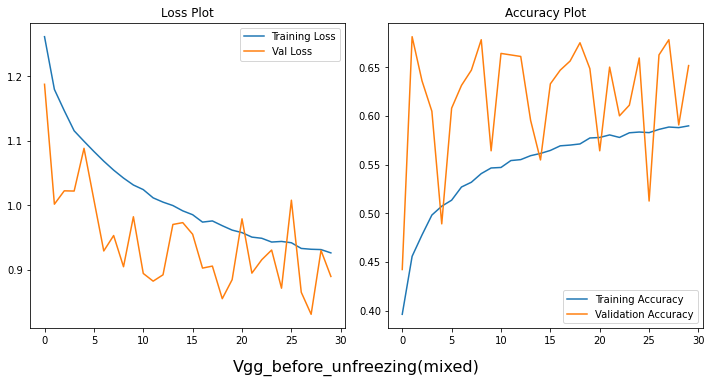

In [ ]:
mx_vgg_loss, mx_vgg_val_loss, mx_vgg_acc, mx_vgg_val_acc = split_history(vgg19_mx_hist)
plot_history(mx_vgg_loss, mx_vgg_acc,mx_vgg_val_loss, mx_vgg_val_acc, s = True)

14/14 [==============================] - 1s 78ms/step
> Vgg_CM_before_unfreezing(mixed)


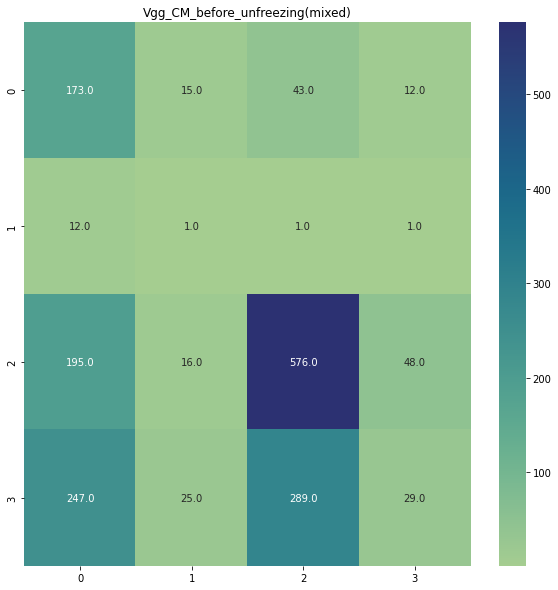

In [ ]:
_vgg_mx = tf.keras.models.load_model('/content/drive/MyDrive/paul/vgg_mx')
_vgg_mx_predictions = np.argmax(_vgg_mx.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _vgg_mx_predictions, s = True)

In [ ]:
mx_vgg19_model = edit_vgg(mx_vgg_base, mx_vgg19_model)

In [ ]:
vgg_mx_cb2 = cb('/content/drive/MyDrive/paul/vgg_mx2')
mx_vgg19_model, vgg19_mx_hist2 = train_m_copy(mx_vgg19_model, restart = False, train_data_gen  = Aug_train_data_gen , epochs = 15, val_data_gen = Or_val_data_gen, val_steps= 5, callback = [vgg_mx_cb2])

Epoch 1/15
194/194 [==============================] - ETA: 0s - loss: 1.5016 - accuracy: 0.3269

194/194 [==============================] - 60s 305ms/step - loss: 1.5016 - accuracy: 0.3269 - val_loss: 1.0502 - val_accuracy: 0.5609
Epoch 2/15
194/194 [==============================] - ETA: 0s - loss: 1.0922 - accuracy: 0.4792

194/194 [==============================] - 62s 316ms/step - loss: 1.0922 - accuracy: 0.4792 - val_loss: 0.8388 - val_accuracy: 0.6922
Epoch 3/15
194/194 [==============================] - 58s 300ms/step - loss: 0.8317 - accuracy: 0.6033 - val_loss: 0.8212 - val_accuracy: 0.6078
Epoch 4/15
194/194 [==============================] - 56s 288ms/step - loss: 0.7642 - accuracy: 0.6304 - val_loss: 0.7939 - val_accuracy: 0.6641
Epoch 5/15
194/194 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.6568

194/194 [==============================] - 59s 306ms/step - loss: 0.7221 - accuracy: 0.6568 - val_loss: 0.6262 - val_accuracy: 0.7594
Epoch 6/15
194/194 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.6751

194/194 [==============================] - 62s 316ms/step - loss: 0.6953 - accuracy: 0.6751 - val_loss: 0.5719 - val_accuracy: 0.8125
Epoch 7/15
194/194 [==============================] - 58s 298ms/step - loss: 0.6214 - accuracy: 0.7094 - val_loss: 0.5931 - val_accuracy: 0.7547
Epoch 8/15
194/194 [==============================] - ETA: 0s - loss: 0.5644 - accuracy: 0.7401

194/194 [==============================] - 60s 307ms/step - loss: 0.5644 - accuracy: 0.7401 - val_loss: 0.5025 - val_accuracy: 0.8188
Epoch 9/15
194/194 [==============================] - 58s 298ms/step - loss: 0.5122 - accuracy: 0.7711 - val_loss: 0.6540 - val_accuracy: 0.6484
Epoch 10/15
194/194 [==============================] - 57s 293ms/step - loss: 0.4604 - accuracy: 0.7976 - val_loss: 0.6535 - val_accuracy: 0.6422
Epoch 11/15
194/194 [==============================] - 56s 288ms/step - loss: 0.4124 - accuracy: 0.8220 - val_loss: 0.6712 - val_accuracy: 0.7000
Epoch 12/15
194/194 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8534

194/194 [==============================] - 61s 312ms/step - loss: 0.3517 - accuracy: 0.8534 - val_loss: 0.2758 - val_accuracy: 0.8734
Epoch 13/15
194/194 [==============================] - ETA: 0s - loss: 0.2952 - accuracy: 0.8775

194/194 [==============================] - 62s 316ms/step - loss: 0.2952 - accuracy: 0.8775 - val_loss: 0.2763 - val_accuracy: 0.8813
Epoch 14/15
194/194 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.8931

194/194 [==============================] - 62s 319ms/step - loss: 0.2571 - accuracy: 0.8931 - val_loss: 0.2016 - val_accuracy: 0.9203
Epoch 15/15
194/194 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9089

194/194 [==============================] - 61s 312ms/step - loss: 0.2288 - accuracy: 0.9089 - val_loss: 0.1693 - val_accuracy: 0.9281


> Vgg_after_unfreezing(mixed)


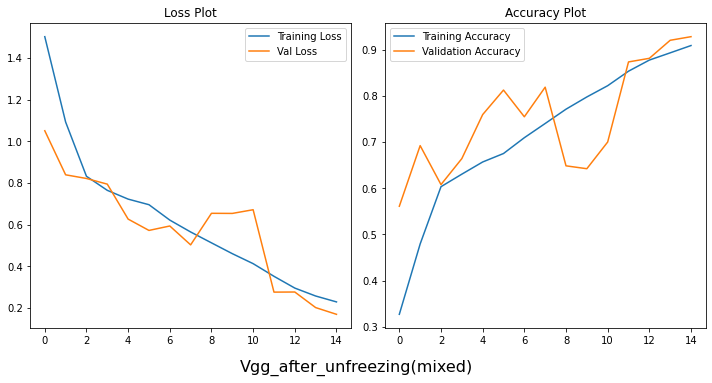

In [ ]:
mx_vgg_loss2, mx_vgg_val_loss2, mx_vgg_acc2, mx_vgg_val_acc2 = split_history(vgg19_mx_hist2)
plot_history(mx_vgg_loss2, mx_vgg_acc2,mx_vgg_val_loss2, mx_vgg_val_acc2, s = True)

14/14 [==============================] - 1s 79ms/step
> Vgg_CM_after_unfreezing(mixed)


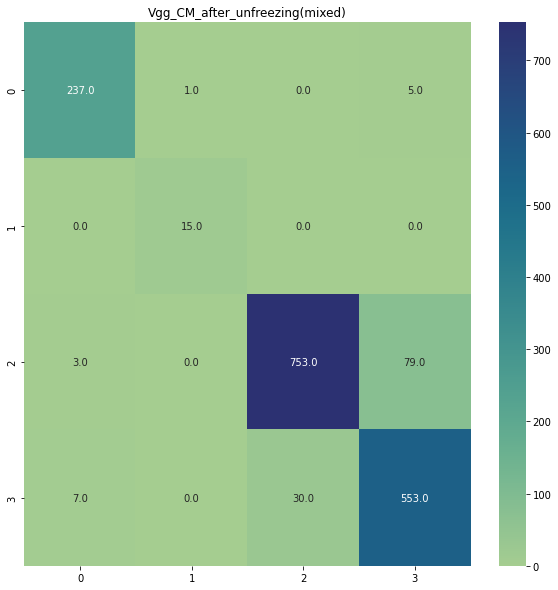

In [ ]:
_vgg_mx2 = tf.keras.models.load_model('/content/drive/MyDrive/paul/vgg_mx2')
_vgg_mx_predictions2 = np.argmax(_vgg_mx2.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _vgg_mx_predictions2, s = True)

## ResNet  Model

In [ ]:
def make_resnet():
  resnet_base = tf.keras.applications.ResNet50V2(
      weights='imagenet',
      input_shape=(48, 48, 3),
      include_top=False)

  resnet_base.trainable = False

  inputs = tf.keras.Input(shape=(48, 48, 3))
  inputs = tf.keras.applications.resnet_v2.preprocess_input(inputs)
  x = resnet_base(inputs, training=False)
  # Convert features of shape `base_model.output_shape[1:]` to vectors
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  # A Dense classifier with a single unit (binary classification)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(64)(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dense(4)(x)
  outputs = tf.keras.layers.Activation('softmax')(x)
  resnet_model = tf.keras.Model(inputs, outputs)

  resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return resnet_base, resnet_model

In [ ]:
def edit_resnet(base, model):
  base.trainable = True
  model.compile(
      optimizer=tf.keras.optimizers.Adam(1e-4),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
  return model

### Training and testing on original images

In [ ]:
rn_or_cb = cb('/content/drive/MyDrive/paul/rn_or')
Or_rn_base, Or_rn_model = make_resnet()
Or_rn_model, resnet_Or_hist = train_m_copy(Or_rn_model,restart = False, train_data_gen = Or_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 30, val_steps= 5, callback = [rn_or_cb])

Epoch 1/30
37/37 [==============================] - ETA: 0s - loss: 1.2370 - accuracy: 0.4810

37/37 [==============================] - 32s 804ms/step - loss: 1.2370 - accuracy: 0.4810 - val_loss: 1.6232 - val_accuracy: 0.1625
Epoch 2/30
37/37 [==============================] - ETA: 0s - loss: 1.0045 - accuracy: 0.5274

37/37 [==============================] - 29s 799ms/step - loss: 1.0045 - accuracy: 0.5274 - val_loss: 1.3973 - val_accuracy: 0.3125
Epoch 3/30
37/37 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.5378

37/37 [==============================] - 30s 812ms/step - loss: 0.9630 - accuracy: 0.5378 - val_loss: 1.2386 - val_accuracy: 0.3547
Epoch 4/30
37/37 [==============================] - ETA: 0s - loss: 0.9449 - accuracy: 0.5507

37/37 [==============================] - 29s 788ms/step - loss: 0.9449 - accuracy: 0.5507 - val_loss: 0.8931 - val_accuracy: 0.6609
Epoch 5/30
37/37 [==============================] - 9s 231ms/step - loss: 0.9441 - accuracy: 0.5453 - val_loss: 1.1590 - val_accuracy: 0.3812
Epoch 6/30
37/37 [==============================] - 9s 235ms/step - loss: 0.9330 - accuracy: 0.5519 - val_loss: 1.1701 - val_accuracy: 0.3703
Epoch 7/30
37/37 [==============================] - ETA: 0s - loss: 0.9117 - accuracy: 0.5718

37/37 [==============================] - 28s 774ms/step - loss: 0.9117 - accuracy: 0.5718 - val_loss: 0.8405 - val_accuracy: 0.6797
Epoch 8/30
37/37 [==============================] - 8s 229ms/step - loss: 0.9007 - accuracy: 0.5742 - val_loss: 1.0314 - val_accuracy: 0.5141
Epoch 9/30
37/37 [==============================] - 9s 235ms/step - loss: 0.8937 - accuracy: 0.5849 - val_loss: 1.0076 - val_accuracy: 0.5531
Epoch 10/30
37/37 [==============================] - 8s 227ms/step - loss: 0.8876 - accuracy: 0.5744 - val_loss: 0.9616 - val_accuracy: 0.5437
Epoch 11/30
37/37 [==============================] - 9s 249ms/step - loss: 0.8818 - accuracy: 0.5802 - val_loss: 1.0735 - val_accuracy: 0.4859
Epoch 12/30
37/37 [==============================] - 8s 228ms/step - loss: 0.8852 - accuracy: 0.5770 - val_loss: 1.0170 - val_accuracy: 0.5063
Epoch 13/30
37/37 [==============================] - 8s 228ms/step - loss: 0.8802 - accuracy: 0.5814 - val_loss: 1.1077 - val_accuracy: 0.4563
Epoch 14/30


> Resnet_before_unfreezing(Unaugmented)


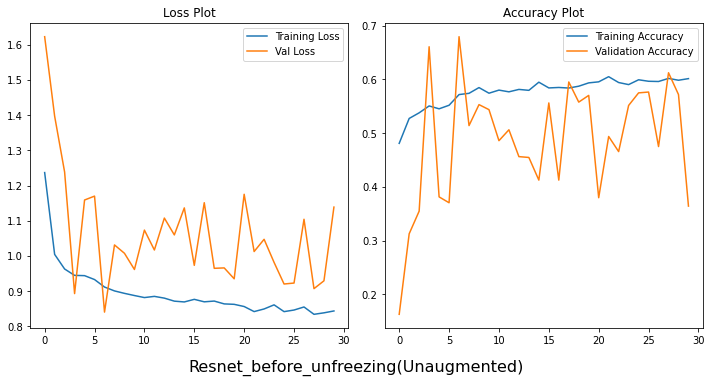

In [ ]:
or_rn_loss, or_rn_val_loss, or_rn_acc, or_rn_val_acc = split_history(resnet_Or_hist)
plot_history(or_rn_loss, or_rn_acc,or_rn_val_loss, or_rn_val_acc, s = True)

14/14 [==============================] - 2s 81ms/step
> ResNet_CM_before_unfreezing(Unaugmented)


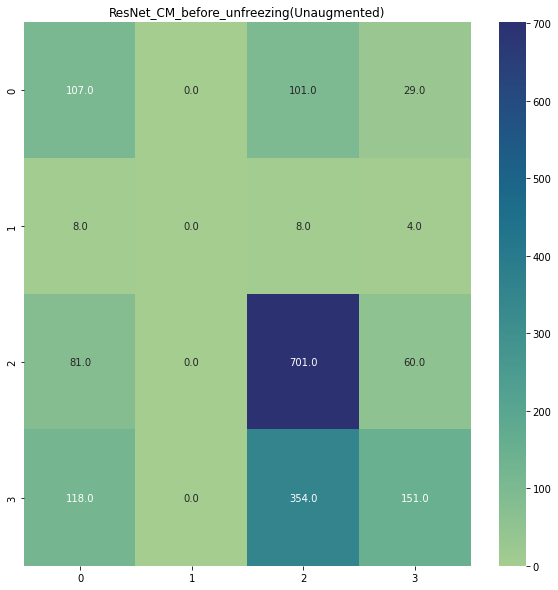

In [ ]:
_rn_or = tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_or')
_rn_or_predictions = np.argmax(_rn_or.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _rn_or_predictions, s = True)

In [ ]:
Or_rn_model =  tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_or')

In [ ]:
rn_or_cb2 = cb('/content/drive/MyDrive/paul/rn_or2')
Or_rn_model = edit_resnet(Or_rn_base, Or_rn_model)
Or_rn_model, rn_Or_hist2 = train_m_copy(Or_rn_model, restart = False, train_data_gen = Or_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 15, val_steps= 5, callback = [rn_or_cb2])

Epoch 1/15
37/37 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.5744

37/37 [==============================] - 34s 870ms/step - loss: 0.8921 - accuracy: 0.5744 - val_loss: 1.0094 - val_accuracy: 0.5203
Epoch 2/15
37/37 [==============================] - 10s 264ms/step - loss: 0.8829 - accuracy: 0.5793 - val_loss: 1.0403 - val_accuracy: 0.4984
Epoch 3/15
37/37 [==============================] - 8s 227ms/step - loss: 0.8792 - accuracy: 0.5823 - val_loss: 1.0520 - val_accuracy: 0.4844
Epoch 4/15
37/37 [==============================] - ETA: 0s - loss: 0.8754 - accuracy: 0.5795

37/37 [==============================] - 30s 828ms/step - loss: 0.8754 - accuracy: 0.5795 - val_loss: 1.0007 - val_accuracy: 0.5281
Epoch 5/15
37/37 [==============================] - 9s 230ms/step - loss: 0.8805 - accuracy: 0.5725 - val_loss: 1.0623 - val_accuracy: 0.4672
Epoch 6/15
37/37 [==============================] - ETA: 0s - loss: 0.8734 - accuracy: 0.5834

37/37 [==============================] - 30s 820ms/step - loss: 0.8734 - accuracy: 0.5834 - val_loss: 1.0146 - val_accuracy: 0.5297
Epoch 7/15
37/37 [==============================] - 8s 227ms/step - loss: 0.8700 - accuracy: 0.5859 - val_loss: 1.1046 - val_accuracy: 0.4297
Epoch 8/15
37/37 [==============================] - 9s 237ms/step - loss: 0.8829 - accuracy: 0.5710 - val_loss: 1.0602 - val_accuracy: 0.4828
Epoch 9/15
37/37 [==============================] - 8s 228ms/step - loss: 0.8667 - accuracy: 0.5915 - val_loss: 1.0815 - val_accuracy: 0.4406
Epoch 10/15
37/37 [==============================] - 8s 227ms/step - loss: 0.8646 - accuracy: 0.5913 - val_loss: 1.0277 - val_accuracy: 0.4969
Epoch 11/15
37/37 [==============================] - 8s 226ms/step - loss: 0.8736 - accuracy: 0.5827 - val_loss: 1.0403 - val_accuracy: 0.4969
Epoch 12/15
37/37 [==============================] - 8s 228ms/step - loss: 0.8729 - accuracy: 0.5814 - val_loss: 1.0640 - val_accuracy: 0.4844
Epoch 13/15
3

> Resnet_after_unfreezing(Unaugmented)


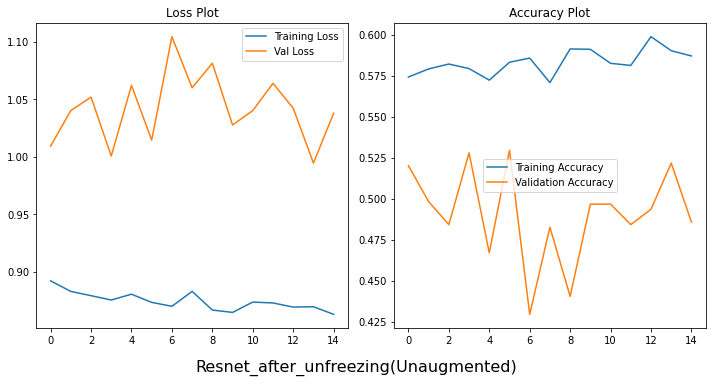

In [ ]:
or_rn_loss2, or_rn_val_loss2, or_rn_acc2, or_rn_val_acc2 = split_history(rn_Or_hist2)
plot_history(or_rn_loss2, or_rn_acc2,or_rn_val_loss2, or_rn_val_acc2, s = True)

14/14 [==============================] - 2s 82ms/step
> Resnet_CM_after_unfreezing(Unaugmented)


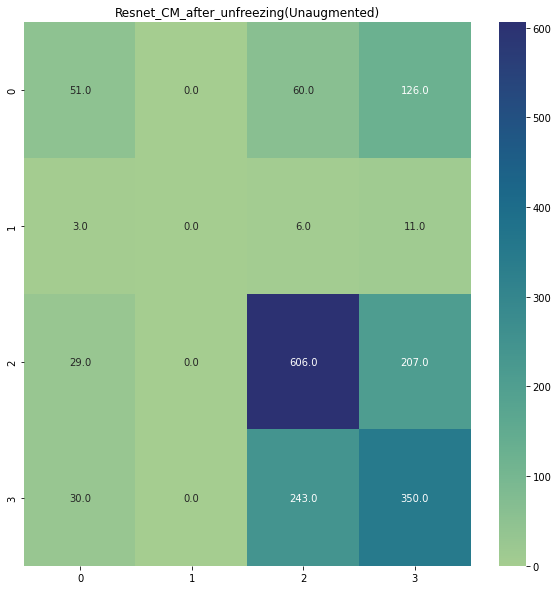

In [ ]:
_rn_or2 = tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_or2')
_rn_or_predictions2 = np.argmax(_rn_or2.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _rn_or_predictions2, s = True)

### Training and testing on augmented images

In [ ]:
rn_aug_cb = cb('/content/drive/MyDrive/paul/rn_aug')
aug_rn_base, aug_rn_model = make_resnet()
aug_rn_model, resnet_aug_hist = train_m_copy(aug_rn_model,restart = False, train_data_gen = Aug_train_data_gen , val_data_gen = Aug_val_data_gen, epochs = 30, val_steps= 5, callback = [rn_aug_cb])

Epoch 1/30
194/194 [==============================] - ETA: 0s - loss: 1.2352 - accuracy: 0.4419

194/194 [==============================] - 77s 378ms/step - loss: 1.2352 - accuracy: 0.4419 - val_loss: 0.9566 - val_accuracy: 0.6109
Epoch 2/30
194/194 [==============================] - 54s 278ms/step - loss: 1.0804 - accuracy: 0.5125 - val_loss: 0.9854 - val_accuracy: 0.5422
Epoch 3/30
194/194 [==============================] - ETA: 0s - loss: 1.0376 - accuracy: 0.5324

194/194 [==============================] - 70s 363ms/step - loss: 1.0376 - accuracy: 0.5324 - val_loss: 0.9602 - val_accuracy: 0.6203
Epoch 4/30
194/194 [==============================] - ETA: 0s - loss: 1.0088 - accuracy: 0.5465

194/194 [==============================] - 73s 376ms/step - loss: 1.0088 - accuracy: 0.5465 - val_loss: 0.8457 - val_accuracy: 0.7000
Epoch 5/30
194/194 [==============================] - 51s 265ms/step - loss: 0.9823 - accuracy: 0.5572 - val_loss: 1.0404 - val_accuracy: 0.5375
Epoch 6/30
194/194 [==============================] - 51s 262ms/step - loss: 0.9786 - accuracy: 0.5579 - val_loss: 1.0493 - val_accuracy: 0.5562
Epoch 7/30
194/194 [==============================] - ETA: 0s - loss: 0.9661 - accuracy: 0.5649

194/194 [==============================] - 72s 372ms/step - loss: 0.9661 - accuracy: 0.5649 - val_loss: 0.6822 - val_accuracy: 0.8172
Epoch 8/30
194/194 [==============================] - ETA: 0s - loss: 0.9401 - accuracy: 0.5749

194/194 [==============================] - 70s 363ms/step - loss: 0.9401 - accuracy: 0.5749 - val_loss: 0.6654 - val_accuracy: 0.8188
Epoch 9/30
194/194 [==============================] - 53s 271ms/step - loss: 0.9348 - accuracy: 0.5808 - val_loss: 0.9759 - val_accuracy: 0.5703
Epoch 10/30
194/194 [==============================] - 51s 264ms/step - loss: 0.9208 - accuracy: 0.5823 - val_loss: 0.7136 - val_accuracy: 0.7969
Epoch 11/30
194/194 [==============================] - 51s 265ms/step - loss: 0.9133 - accuracy: 0.5909 - val_loss: 0.8652 - val_accuracy: 0.6750
Epoch 12/30
194/194 [==============================] - 53s 274ms/step - loss: 0.9084 - accuracy: 0.5945 - val_loss: 0.7536 - val_accuracy: 0.7344
Epoch 13/30
194/194 [==============================] - 51s 263ms/step - loss: 0.9049 - accuracy: 0.5940 - val_loss: 0.8894 - val_accuracy: 0.6313
Epoch 14/30
194/194 [==============================] - 51s 262ms/step - loss: 0.8940 - accuracy: 0.5955 - val_loss: 0.7401 - val_accuracy

> Resnet_before_unfreezing(Augmented)


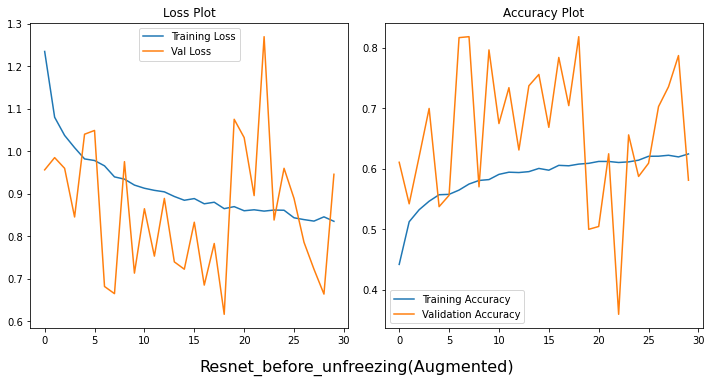

In [ ]:
aug_rn_loss, aug_rn_val_loss, aug_rn_acc, aug_rn_val_acc = split_history(resnet_aug_hist)
plot_history(aug_rn_loss, aug_rn_acc,aug_rn_val_loss, aug_rn_val_acc, s = True)

73/73 [==============================] - 12s 155ms/step
> Resnet_CM_before_unfreezing(Augmented)


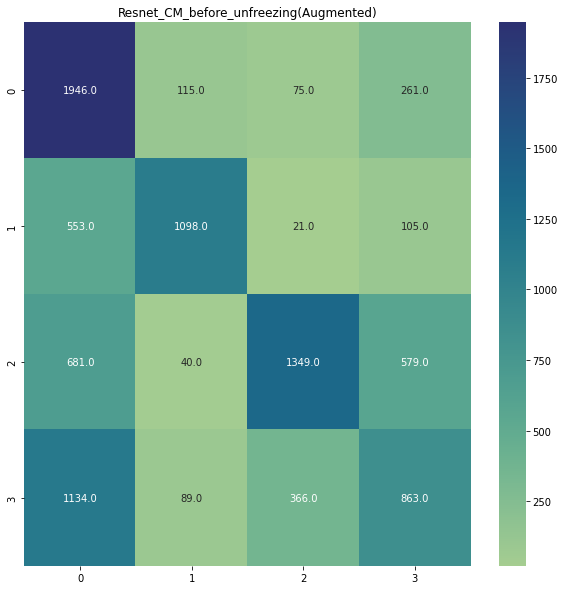

In [ ]:
_rn_aug = tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_aug')
_rn_aug_predictions = np.argmax(_rn_aug.predict(Aug_val_data_gen), axis = 1)
plot_cm(Aug_val_data_gen.classes, _rn_aug_predictions, s = True)

In [ ]:
rn_aug_cb2 = cb('/content/drive/MyDrive/paul/rn_aug2')
aug_rn_model = edit_resnet(aug_rn_base, aug_rn_model)
aug_rn_model, rn_aug_hist2 = train_m_copy(aug_rn_model, restart = False, train_data_gen = Aug_train_data_gen , val_data_gen = Aug_val_data_gen, epochs = 15, val_steps= 5, callback = [rn_aug_cb2])

Epoch 1/15
194/194 [==============================] - ETA: 0s - loss: 1.1677 - accuracy: 0.4704

194/194 [==============================] - 91s 427ms/step - loss: 1.1677 - accuracy: 0.4704 - val_loss: 0.9129 - val_accuracy: 0.7500
Epoch 2/15
194/194 [==============================] - ETA: 0s - loss: 0.8014 - accuracy: 0.6150

194/194 [==============================] - 81s 415ms/step - loss: 0.8014 - accuracy: 0.6150 - val_loss: 0.7373 - val_accuracy: 0.8500
Epoch 3/15
194/194 [==============================] - 57s 292ms/step - loss: 0.7157 - accuracy: 0.6612 - val_loss: 0.5371 - val_accuracy: 0.8359
Epoch 4/15
194/194 [==============================] - ETA: 0s - loss: 0.6462 - accuracy: 0.7003

194/194 [==============================] - 79s 408ms/step - loss: 0.6462 - accuracy: 0.7003 - val_loss: 0.4491 - val_accuracy: 0.8875
Epoch 5/15
194/194 [==============================] - ETA: 0s - loss: 0.5860 - accuracy: 0.7345

194/194 [==============================] - 80s 412ms/step - loss: 0.5860 - accuracy: 0.7345 - val_loss: 0.3235 - val_accuracy: 0.9203
Epoch 6/15
194/194 [==============================] - 58s 298ms/step - loss: 0.5206 - accuracy: 0.7680 - val_loss: 0.3500 - val_accuracy: 0.8891
Epoch 7/15
194/194 [==============================] - 56s 288ms/step - loss: 0.4574 - accuracy: 0.7988 - val_loss: 0.3746 - val_accuracy: 0.8516
Epoch 8/15
194/194 [==============================] - 56s 288ms/step - loss: 0.4260 - accuracy: 0.8167 - val_loss: 0.3505 - val_accuracy: 0.8797
Epoch 9/15
194/194 [==============================] - 57s 293ms/step - loss: 0.3549 - accuracy: 0.8491 - val_loss: 0.6906 - val_accuracy: 0.7188
Epoch 10/15
194/194 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8589

194/194 [==============================] - 78s 402ms/step - loss: 0.3306 - accuracy: 0.8589 - val_loss: 0.2058 - val_accuracy: 0.9250
Epoch 11/15
194/194 [==============================] - 57s 294ms/step - loss: 0.2748 - accuracy: 0.8883 - val_loss: 0.2818 - val_accuracy: 0.8906
Epoch 12/15
194/194 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9011

194/194 [==============================] - 78s 403ms/step - loss: 0.2476 - accuracy: 0.9011 - val_loss: 0.1463 - val_accuracy: 0.9625
Epoch 13/15
194/194 [==============================] - 56s 289ms/step - loss: 0.2122 - accuracy: 0.9180 - val_loss: 0.1778 - val_accuracy: 0.9328
Epoch 14/15
194/194 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9222

194/194 [==============================] - 79s 408ms/step - loss: 0.2025 - accuracy: 0.9222 - val_loss: 0.0815 - val_accuracy: 0.9688
Epoch 15/15
194/194 [==============================] - ETA: 0s - loss: 0.1808 - accuracy: 0.9303

194/194 [==============================] - 79s 405ms/step - loss: 0.1808 - accuracy: 0.9303 - val_loss: 0.0650 - val_accuracy: 0.9734


> Resnet_after_unfreezing(Augmented)


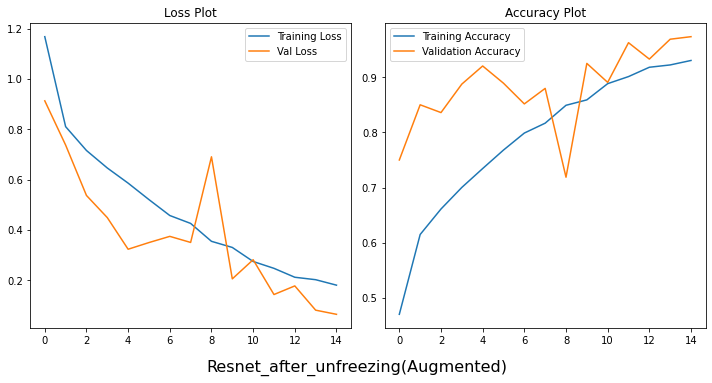

In [ ]:
aug_rn_loss2, aug_rn_val_loss2, aug_rn_acc2, aug_rn_val_acc2 = split_history(rn_aug_hist2)
plot_history(aug_rn_loss2, aug_rn_acc2,aug_rn_val_loss2, aug_rn_val_acc2, s = True)

> Resnet_CM_after_unfreezing(Augmented)


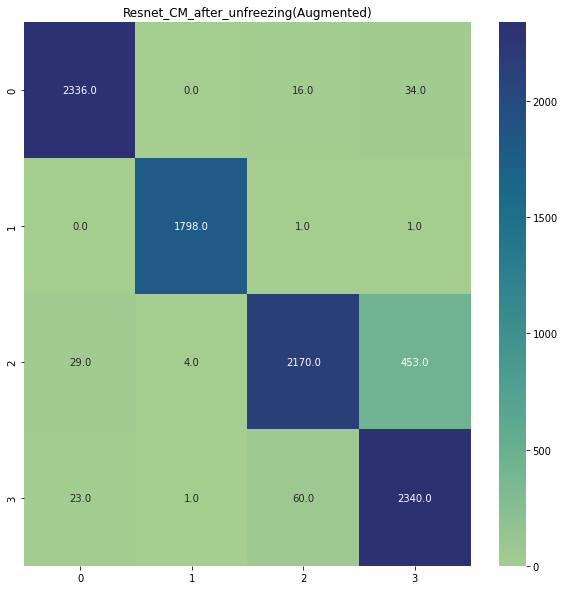

In [ ]:
_rn_aug2 = tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_aug2')
_rn_aug_predictions2 = np.argmax(_rn_aug2.predict(Aug_val_data_gen), axis = 1)
plot_cm(Aug_val_data_gen.classes, _rn_aug_predictions2, s = True)

### Training on augmented and testing on original

In [ ]:
rn_mx_cb = cb('/content/drive/MyDrive/paul/rn_mx')
mx_rn_base, mx_rn_model = make_resnet()
mx_rn_model, resnet_mx_hist = train_m_copy(mx_rn_model,restart = False, train_data_gen = Aug_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 30, val_steps= 5, callback = [rn_mx_cb])

94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/30
194/194 [==============================] - ETA: 0s - loss: 1.2627 - accuracy: 0.4395

194/194 [==============================] - 71s 354ms/step - loss: 1.2627 - accuracy: 0.4395 - val_loss: 0.9821 - val_accuracy: 0.6000
Epoch 2/30
194/194 [==============================] - 48s 249ms/step - loss: 1.0735 - accuracy: 0.5106 - val_loss: 1.0152 - val_accuracy: 0.5656
Epoch 3/30
194/194 [==============================] - 48s 247ms/step - loss: 1.0279 - accuracy: 0.5418 - val_loss: 0.9454 - val_accuracy: 0.5953
Epoch 4/30
194/194 [==============================] - 48s 245ms/step - loss: 0.9895 - accuracy: 0.5542 - val_loss: 0.9270 - val_accuracy: 0.5562
Epoch 5/30
194/194 [==============================] - ETA: 0s - loss: 0.9653 - accuracy: 0.5645

194/194 [==============================] - 66s 339ms/step - loss: 0.9653 - accuracy: 0.5645 - val_loss: 0.8733 - val_accuracy: 0.6016
Epoch 6/30
194/194 [==============================] - 48s 245ms/step - loss: 0.9500 - accuracy: 0.5747 - val_loss: 0.9471 - val_accuracy: 0.5578
Epoch 7/30
194/194 [==============================] - 48s 245ms/step - loss: 0.9330 - accuracy: 0.5783 - val_loss: 0.8917 - val_accuracy: 0.5719
Epoch 8/30
194/194 [==============================] - 49s 252ms/step - loss: 0.9155 - accuracy: 0.5875 - val_loss: 0.8771 - val_accuracy: 0.5766
Epoch 9/30
194/194 [==============================] - ETA: 0s - loss: 0.9127 - accuracy: 0.5886

194/194 [==============================] - 66s 339ms/step - loss: 0.9127 - accuracy: 0.5886 - val_loss: 0.8635 - val_accuracy: 0.6062
Epoch 10/30
194/194 [==============================] - 48s 250ms/step - loss: 0.9013 - accuracy: 0.5943 - val_loss: 0.9182 - val_accuracy: 0.5594
Epoch 11/30
194/194 [==============================] - 47s 244ms/step - loss: 0.8921 - accuracy: 0.5977 - val_loss: 0.9535 - val_accuracy: 0.5406
Epoch 12/30
194/194 [==============================] - 49s 251ms/step - loss: 0.8927 - accuracy: 0.5942 - val_loss: 0.8731 - val_accuracy: 0.5891
Epoch 13/30
194/194 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.6111

194/194 [==============================] - 65s 337ms/step - loss: 0.8682 - accuracy: 0.6111 - val_loss: 0.8344 - val_accuracy: 0.6203
Epoch 14/30
194/194 [==============================] - 48s 246ms/step - loss: 0.8764 - accuracy: 0.6068 - val_loss: 0.9293 - val_accuracy: 0.5703
Epoch 15/30
194/194 [==============================] - 47s 244ms/step - loss: 0.8702 - accuracy: 0.6051 - val_loss: 0.8392 - val_accuracy: 0.6187
Epoch 16/30
194/194 [==============================] - 49s 251ms/step - loss: 0.8622 - accuracy: 0.6111 - val_loss: 0.9178 - val_accuracy: 0.5359
Epoch 17/30
194/194 [==============================] - 48s 246ms/step - loss: 0.8537 - accuracy: 0.6179 - val_loss: 0.9050 - val_accuracy: 0.5469
Epoch 18/30
194/194 [==============================] - 47s 244ms/step - loss: 0.8609 - accuracy: 0.6125 - val_loss: 0.8713 - val_accuracy: 0.5844
Epoch 19/30
194/194 [==============================] - 49s 251ms/step - loss: 0.8481 - accuracy: 0.6127 - val_loss: 0.9260 - val_accurac

194/194 [==============================] - 66s 340ms/step - loss: 0.8329 - accuracy: 0.6251 - val_loss: 0.8344 - val_accuracy: 0.6234
Epoch 27/30
194/194 [==============================] - 49s 253ms/step - loss: 0.8357 - accuracy: 0.6216 - val_loss: 0.9288 - val_accuracy: 0.5562
Epoch 28/30
194/194 [==============================] - 48s 245ms/step - loss: 0.8272 - accuracy: 0.6270 - val_loss: 0.7998 - val_accuracy: 0.6187
Epoch 29/30
194/194 [==============================] - 47s 245ms/step - loss: 0.8228 - accuracy: 0.6309 - val_loss: 0.9642 - val_accuracy: 0.4859
Epoch 30/30
194/194 [==============================] - ETA: 0s - loss: 0.8160 - accuracy: 0.6316

194/194 [==============================] - 65s 338ms/step - loss: 0.8160 - accuracy: 0.6316 - val_loss: 0.8632 - val_accuracy: 0.6250


> Resnet_before_unfreezing(mixed)


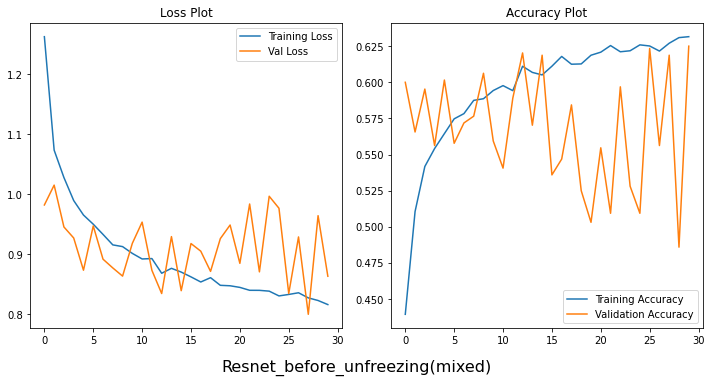

In [ ]:
mx_rn_loss, mx_rn_val_loss, mx_rn_acc, mx_rn_val_acc = split_history(resnet_mx_hist)
plot_history(mx_rn_loss, mx_rn_acc,mx_rn_val_loss, mx_rn_val_acc, s = True)

> Resnet_CM_before_unfreezing(mixed)


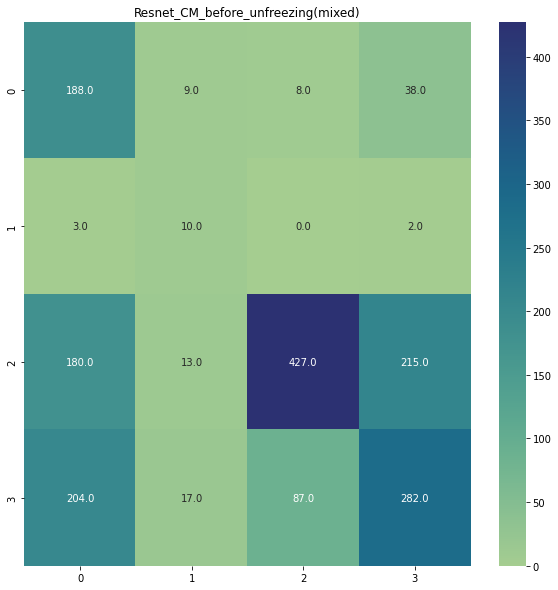

In [ ]:
_rn_mx = tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_mx')
_rn_mx_predictions = np.argmax(_rn_mx.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _rn_mx_predictions, s = True)

In [ ]:
rn_mx_cb2 = cb('/content/drive/MyDrive/paul/rn_mx2')
mx_rn_model = edit_resnet(mx_rn_base, mx_rn_model)
mx_rn_model, resnet_mx_hist2 = train_m_copy(mx_rn_model,restart = False, train_data_gen = Aug_train_data_gen , val_data_gen = Or_val_data_gen, epochs = 15, val_steps= 5, callback = [rn_mx_cb2])

Epoch 1/15
194/194 [==============================] - ETA: 0s - loss: 1.2623 - accuracy: 0.4425

194/194 [==============================] - 83s 386ms/step - loss: 1.2623 - accuracy: 0.4425 - val_loss: 0.8025 - val_accuracy: 0.6313
Epoch 2/15
194/194 [==============================] - ETA: 0s - loss: 0.7813 - accuracy: 0.6336

194/194 [==============================] - 76s 390ms/step - loss: 0.7813 - accuracy: 0.6336 - val_loss: 0.7821 - val_accuracy: 0.6328
Epoch 3/15
194/194 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.6765

194/194 [==============================] - 75s 385ms/step - loss: 0.6993 - accuracy: 0.6765 - val_loss: 0.7269 - val_accuracy: 0.6859
Epoch 4/15
194/194 [==============================] - 53s 272ms/step - loss: 0.6333 - accuracy: 0.7132 - val_loss: 0.7104 - val_accuracy: 0.6297
Epoch 5/15
194/194 [==============================] - 52s 269ms/step - loss: 0.5699 - accuracy: 0.7421 - val_loss: 0.6613 - val_accuracy: 0.6469
Epoch 6/15
194/194 [==============================] - ETA: 0s - loss: 0.5126 - accuracy: 0.7704

194/194 [==============================] - 75s 385ms/step - loss: 0.5126 - accuracy: 0.7704 - val_loss: 0.5039 - val_accuracy: 0.7641
Epoch 7/15
194/194 [==============================] - 53s 271ms/step - loss: 0.4602 - accuracy: 0.8010 - val_loss: 0.6457 - val_accuracy: 0.6531
Epoch 8/15
194/194 [==============================] - 52s 269ms/step - loss: 0.3908 - accuracy: 0.8323 - val_loss: 0.5265 - val_accuracy: 0.7453
Epoch 9/15
194/194 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8531

194/194 [==============================] - 73s 378ms/step - loss: 0.3474 - accuracy: 0.8531 - val_loss: 0.3852 - val_accuracy: 0.8234
Epoch 10/15
194/194 [==============================] - 54s 280ms/step - loss: 0.3192 - accuracy: 0.8687 - val_loss: 0.4707 - val_accuracy: 0.7781
Epoch 11/15
194/194 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.8871

194/194 [==============================] - 74s 379ms/step - loss: 0.2727 - accuracy: 0.8871 - val_loss: 0.3337 - val_accuracy: 0.8844
Epoch 12/15
194/194 [==============================] - 53s 273ms/step - loss: 0.2296 - accuracy: 0.9074 - val_loss: 0.4751 - val_accuracy: 0.8344
Epoch 13/15
194/194 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9138

194/194 [==============================] - 73s 375ms/step - loss: 0.2186 - accuracy: 0.9138 - val_loss: 0.2343 - val_accuracy: 0.9219
Epoch 14/15
194/194 [==============================] - 53s 273ms/step - loss: 0.1877 - accuracy: 0.9277 - val_loss: 0.2499 - val_accuracy: 0.9187
Epoch 15/15
194/194 [==============================] - 52s 269ms/step - loss: 0.1756 - accuracy: 0.9322 - val_loss: 0.2886 - val_accuracy: 0.8922


> Resnet_after_unfreezing(mixed)


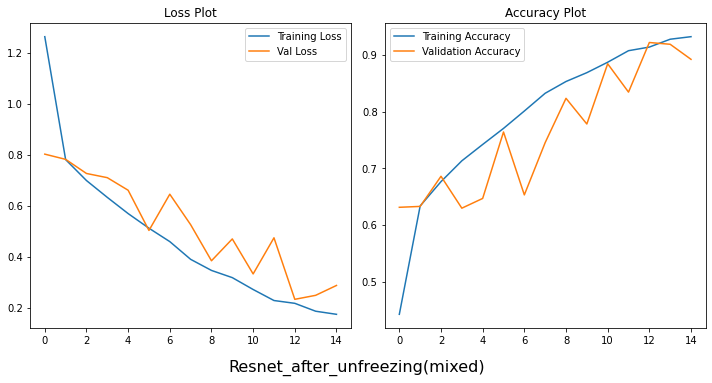

In [ ]:
mx_rn_loss2, mx_rn_val_loss2, mx_rn_acc2, mx_rn_val_acc2 = split_history(resnet_mx_hist2)
plot_history(mx_rn_loss2, mx_rn_acc2,mx_rn_val_loss2, mx_rn_val_acc2, s = True)

> Resnet_CM_after_unfreezing(mixed)


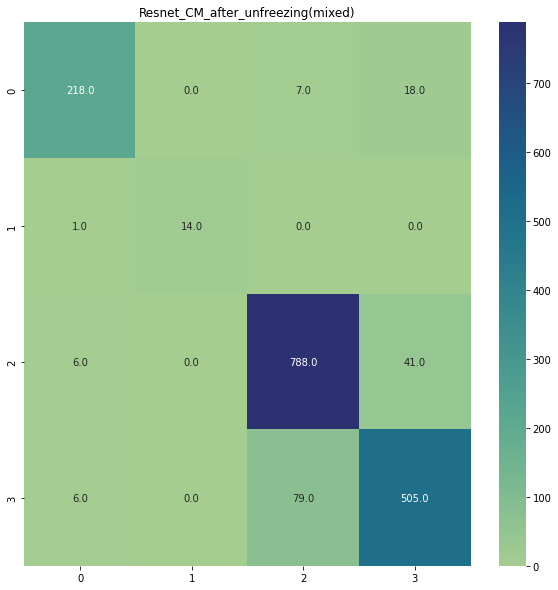

In [ ]:
_rn_mx2 = tf.keras.models.load_model('/content/drive/MyDrive/paul/rn_mx2')
_rn_mx_predictions2 = np.argmax(_rn_mx2.predict(Or_val_data_gen), axis = 1)
plot_cm(Or_val_data_gen.classes, _rn_mx_predictions2, s = True)